# Lending Club Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

### Setting display options

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; height:100%;}</style>"))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 40000 

## Load Dataset - loan.csv

In [3]:
loan = pd.read_csv('loan.csv')

c:\anaconda\envs\upgrad_base\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Checking Top records in the dataset

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


# Data Cleaning

### Percentage of null values for each column - Loan

In [5]:
missing_values = pd.concat([loan.isnull().sum(),loan.isnull().sum()*100/len(loan)],axis=1)

missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
bc_open_to_buy,39717,100.000
acc_open_past_24mths,39717,100.000
bc_util,39717,100.000
mo_sin_old_il_acct,39717,100.000
mo_sin_old_rev_tl_op,39717,100.000
mo_sin_rcnt_rev_tl_op,39717,100.000
mo_sin_rcnt_tl,39717,100.000
mort_acc,39717,100.000
mths_since_recent_bc,39717,100.000
mths_since_recent_bc_dlq,39717,100.000


### Removing columns in loans with 100% missing data(empty columns)

In [6]:
loan = loan.drop(columns = loan.isnull().sum().index[loan.isnull().sum()==len(loan)])

### Percentage of null values for each column after removing empty columns - Loan

In [7]:
missing_values = pd.concat([loan.isnull().sum(),loan.isnull().sum()*100/len(loan)],axis=1)

missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
next_pymnt_d,38577,97.130
mths_since_last_record,36931,92.985
mths_since_last_delinq,25682,64.662
desc,12940,32.581
emp_title,2459,6.191
emp_length,1075,2.707
pub_rec_bankruptcies,697,1.755
last_pymnt_d,71,0.179
collections_12_mths_ex_med,56,0.141
chargeoff_within_12_mths,56,0.141


### Removing columns (next_pymnt_d,mths_since_last_record) in loans as more than 50% of data is missing

In [8]:
drop_list = missing_values[missing_values['% of Total Values']>50].index
loan = loan.drop(columns = list(drop_list))



### Identifying missing values after removing columns with most NA values

Percentage of null values for each column after removing empty columns with more than 90% data missing - Loan

In [9]:
missing_values = pd.concat([loan.isnull().sum(),loan.isnull().sum()*100/len(loan)],axis=1)
missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
desc,12940,32.581
emp_title,2459,6.191
emp_length,1075,2.707
pub_rec_bankruptcies,697,1.755
last_pymnt_d,71,0.179
collections_12_mths_ex_med,56,0.141
chargeoff_within_12_mths,56,0.141
revol_util,50,0.126
tax_liens,39,0.098
title,11,0.028


### Dropping `desc` as similar information present in `title` and `purpose`

In [10]:
loan = loan.drop(columns=['desc'])

In [11]:
missing_values = pd.concat([loan.isnull().sum(),loan.isnull().sum()*100/len(loan)],axis=1)

missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
emp_title,2459,6.191
emp_length,1075,2.707
pub_rec_bankruptcies,697,1.755
last_pymnt_d,71,0.179
collections_12_mths_ex_med,56,0.141
chargeoff_within_12_mths,56,0.141
revol_util,50,0.126
tax_liens,39,0.098
title,11,0.028
last_credit_pull_d,2,0.005


As observed above cummulative of only 6% data is missing at this stage. Data in the numeric colums such as `pub_rec_bankruptcies`, `chargeoff_within_12_mths`, `tax_liens` and `emp_length` can be replaced with median or mode but to avoid any bias. Removing rows with missing values in the following columns as presented above

In [12]:
loan = loan[~loan.emp_title.isnull()]
loan = loan[~loan.emp_length.isnull()]
loan = loan[~loan.pub_rec_bankruptcies.isnull()]
loan = loan[~loan.collections_12_mths_ex_med.isnull()]
loan = loan[~loan.chargeoff_within_12_mths.isnull()]
loan = loan[~loan.revol_util.isnull()]
loan = loan[~loan.tax_liens.isnull()]
loan = loan[~loan.title.isnull()]
loan = loan[~loan.last_credit_pull_d.isnull()]
loan = loan[~loan.last_pymnt_d.isnull()]


In [13]:
loan.shape

(36431, 53)

In [14]:
missing_values = pd.concat([loan.isnull().sum(),loan.isnull().sum()*100/len(loan)],axis=1)

missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values


#### We are left with `91.72` of data after removing all the missing values in rows and columns
Now, we have now reduced the data set to have 36433 loan records and 50 attributes with no missing values.

In [15]:
(len(loan)/39717)*100

91.7264647380215

### Unique values for each columns

In [16]:
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       48
issue_d                          51
total_acc                        79
last_credit_pull_d               96
last_pymnt_d                     97
int_rate                    

### There are many columns with single attribute as they would not contribute much to the analysis we can drop the columns

In [17]:
single_value_list = loan.nunique().sort_values()[loan.nunique().sort_values()==1]
loan = loan.drop(columns = list(single_value_list.index))
loan.shape

(36431, 44)

## Let's understand different dtypes in the dataframe and convert necessary columns to correct data type

In [18]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

### Date Type columns to be converted

In [19]:
loan.earliest_cr_line.head()

1    Apr-99
3    Feb-96
4    Jan-96
5    Nov-04
6    Jul-05
Name: earliest_cr_line, dtype: object

In [20]:
loan.issue_d.head()

1    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
Name: issue_d, dtype: object

In [21]:
loan.last_pymnt_d.head()

1    Apr-13
3    Jan-15
4    May-16
5    Jan-15
6    May-16
Name: last_pymnt_d, dtype: object

In [22]:
loan.last_credit_pull_d.head()


1    Sep-13
3    Apr-16
4    May-16
5    Jan-16
6    May-16
Name: last_credit_pull_d, dtype: object

### Integer Type Columns to be converted

In [23]:
loan.emp_length.head()


1     < 1 year
3    10+ years
4       1 year
5      3 years
6      8 years
Name: emp_length, dtype: object

In [24]:
loan.zip_code.head()


1    309xx
3    917xx
4    972xx
5    852xx
6    280xx
Name: zip_code, dtype: object

In [25]:
loan.revol_util.head()

1     9.40%
3       21%
4    53.90%
5    28.30%
6    85.60%
Name: revol_util, dtype: object

## Data Type Conversion

### Object to int64 

1. __int_rate__
2. __emp_length__
3. __zip_code__
4. __revol_util__

### Object to Date type
1. __issue_d__
2. __earliest_cr_line__
3. __last_pymnt_d__
4. __last_credit_pull_d__

### Converting the dtype of these columns to datetime

In [26]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

### Verifying all the converted data types

In [27]:
loan.issue_d.dt.year.value_counts()

2011    20156
2010    10795
2009     4423
2008     1053
2007        4
Name: issue_d, dtype: int64

In [28]:
loan.last_credit_pull_d.dt.year.value_counts()

2016    14357
2014     5720
2015     5142
2013     4773
2012     3742
2011     1902
2010      631
2009      145
2008       19
Name: last_credit_pull_d, dtype: int64

In [29]:
loan.last_pymnt_d.dt.year.value_counts()

2013    8855
2014    8577
2012    8374
2011    4477
2015    2316
2016    1914
2010    1474
2009     403
2008      41
Name: last_pymnt_d, dtype: int64

In [30]:
loan.earliest_cr_line.dt.year.value_counts()

2000    3033
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     969
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line, dtype: int64

### `earliest_cr_line` has few years after `2016` which observed to be the max year in the rest of the date fields
Fixing that by subtracting years after 2011 with 100 as python interpreter has considered all the years to be in 21st century

In [31]:
loan.earliest_cr_line[loan.earliest_cr_line.dt.year>2016] = loan.earliest_cr_line[loan.earliest_cr_line.dt.year>2016] - pd.DateOffset(years=100)

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
loan.earliest_cr_line.sort_values(ascending = True).head()

14077   1946-01-01
15269   1950-12-01
22031   1954-11-01
13975   1956-09-01
11303   1962-09-01
Name: earliest_cr_line, dtype: datetime64[ns]

### Converting the dtype of these columns to int

In [33]:
loan.int_rate = loan.int_rate.apply(lambda x : float(x[:-1]))
loan = loan.replace({"emp_length": {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5, '6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10} })
loan.zip_code = loan.zip_code.apply(lambda x : int(x[:-2]))
loan.revol_util = loan.revol_util.apply(lambda x : float(x[:-1]))


### Verifying all the converted data types

In [34]:
loan.int_rate.head()


1   15.270
3   13.490
4   12.690
5    7.900
6   15.960
Name: int_rate, dtype: float64

In [35]:
loan.emp_length.head()


1     0
3    10
4     1
5     3
6     8
Name: emp_length, dtype: int64

In [36]:
loan.zip_code.head()


1    309
3    917
4    972
5    852
6    280
Name: zip_code, dtype: int64

In [37]:
loan.revol_util.head()

1    9.400
3   21.000
4   53.900
5   28.300
6   85.600
Name: revol_util, dtype: float64

In [38]:
loan.int_rate.head()


1   15.270
3   13.490
4   12.690
5    7.900
6   15.960
Name: int_rate, dtype: float64

In [39]:
data_dict = pd.read_excel('Data_Dictionary.xlsx')

---
 
# Data Analysis - Univariate

---

##### Oberving loan data based on loan_status

In [40]:
# Resource : https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
def barplot_labels(xs,ys,percent = False):
    plt.clf()

# using some dummy data for this example
    
    plt.figure(figsize=(5,7))
    plt.bar(xs,ys,color = sb.color_palette('husl', 16))

    # zip joins x and y coordinates in pairs
    for x,y in zip(xs,ys):
        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
    


In [41]:
# Resource : https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
def show_values_on_bars(axs,percent=True, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()+0.4
                if p.get_height()>0 and percent:
                    value = str(int(p.get_height()))+'%'
                elif percent==False and p.get_height()>0:
                    value = str(int(p.get_height()))
                else:
                    value='0%'
                
                ax.text(_x, _y, value, ha="center",fontsize='16') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### Distribution of loan_status in the dataset

### As we need to focus mainly on loans which were charged off and fully paid filtering out the data with these two categories

In [42]:
final_loan = loan[loan.loan_status.isin(['Charged Off','Fully Paid'])]
charged_off_loans = final_loan[final_loan.loan_status=="Charged Off"]
fully_paid_loans = final_loan[final_loan.loan_status=="Fully Paid"]

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


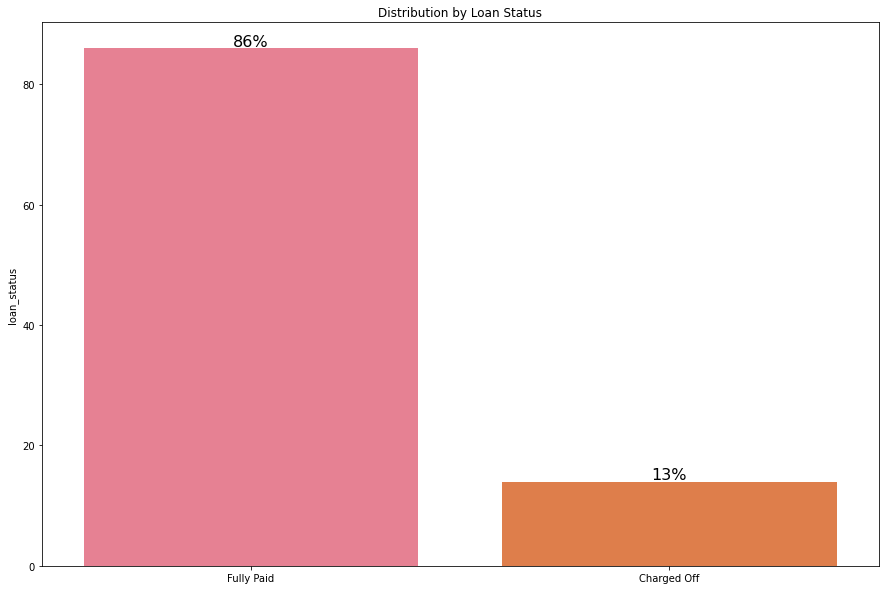

In [43]:
g= (final_loan.loan_status.value_counts()*100/len(final_loan))
plt.figure(figsize=(15,10))
f = sb.barplot(g.index,g,palette=sb.color_palette('husl', 16))
f.set_title('Distribution by Loan Status')
show_values_on_bars(f)

In [44]:
data_dict = data_dict[data_dict.LoanStatNew.isin(final_loan.columns)]

### Creating Target Variable to identify fully paid vs charged off

In [45]:
final_loan['Target'] = final_loan.loan_status.apply(lambda x : 0 if x=='Charged Off' else 1)
final_loan.Target.value_counts()

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    30423
0     4942
Name: Target, dtype: int64

In [46]:
((final_loan.groupby(['loan_status']).total_pymnt.sum()*100)/final_loan.groupby(['loan_status']).loan_amnt.sum())

loan_status
Charged Off    57.123
Fully Paid    117.242
dtype: float64

### Fully paid received 117% on the loan amount resulting in  17% profit and where as charged off recovered only 57% of the total loan amount

In [47]:
final_loan.groupby(['loan_status']).loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.000,12285.507,8064.946,1000.000,6000.000,10000.000,17000.000,35000.000
Fully Paid,30423.000,10945.992,7181.841,500.000,5500.000,9600.000,15000.000,35000.000


In [48]:
(final_loan.groupby(['loan_status']).loan_amnt.mean()-final_loan.groupby(['loan_status']).loan_amnt.median())*100/final_loan.groupby(['loan_status']).loan_amnt.mean()

loan_status
Charged Off   18.603
Fully Paid    12.297
Name: loan_amnt, dtype: float64

1. As observed above the charged off mean is `18%` greater than charged off median, but when compared to fully paid the difference is only `12%` 
2. Majority of the loans are lesser than `75%` percentile value (150000)

#### Box plot distribution of `loan_amnt` based on `loan_status`

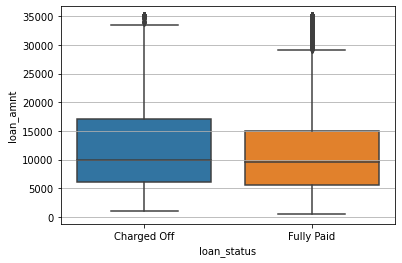

In [49]:
sb.boxplot(data = final_loan,x='loan_status',y='loan_amnt')
plt.grid(axis='y')

Text(0.5, 1.0, 'Loan amount Distribution for Charged Off')

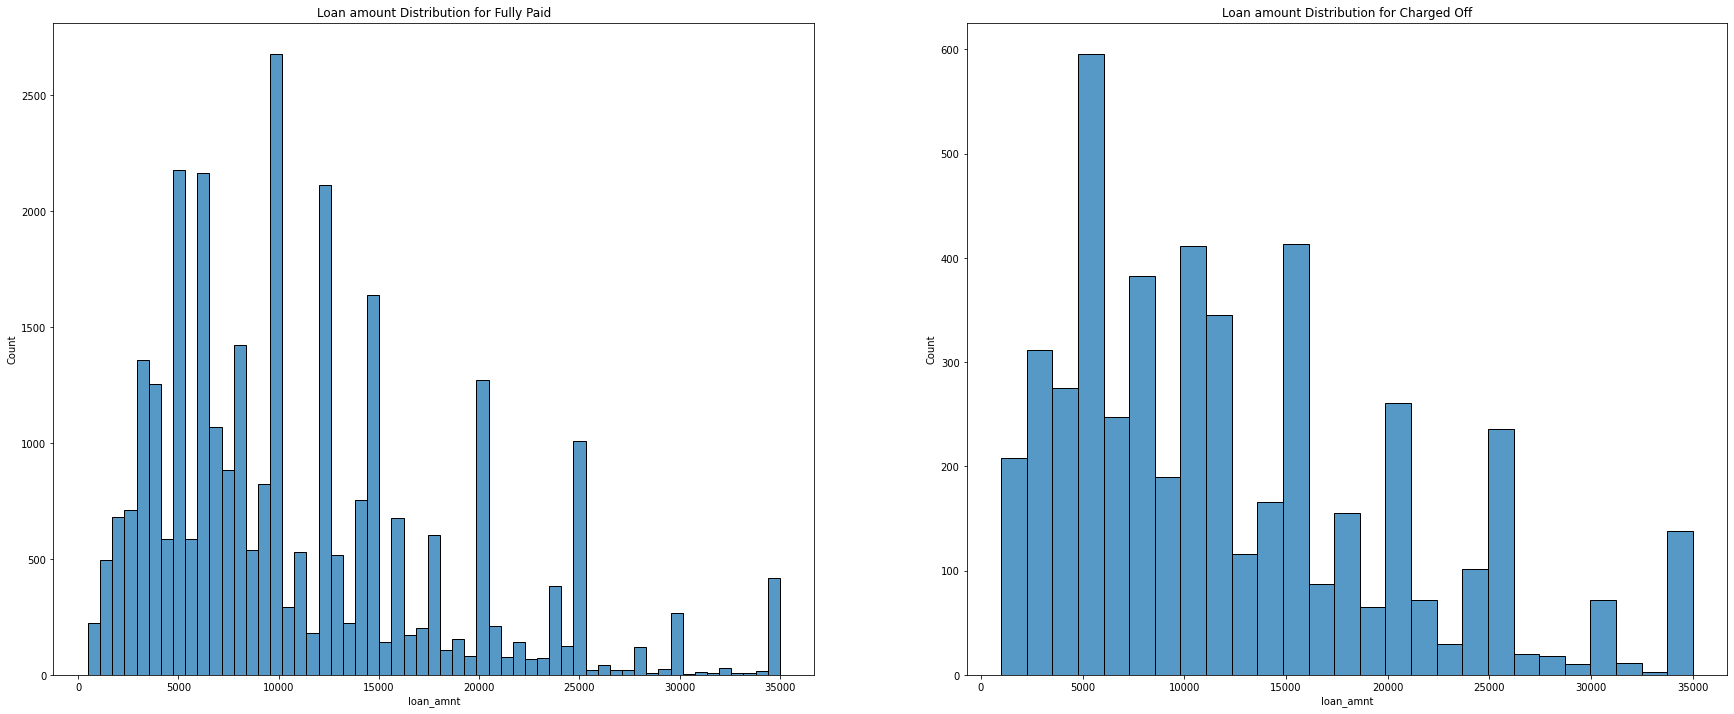

In [50]:
f,axes = plt.subplots(1,2,figsize=(30,12))
sb.histplot(final_loan[final_loan.loan_status=='Fully Paid'].loan_amnt,ax = axes[0])
sb.histplot(final_loan[final_loan.loan_status=='Charged Off'].loan_amnt,ax = axes[1])
axes[0].set_title("Loan amount Distribution for Fully Paid")
axes[1].set_title("Loan amount Distribution for Charged Off")


### Creating derived metrics using the loan amount by using buckets to place the value in the given range of buckets

In [51]:
final_loan['loan_amnt_bins'] = pd.cut(x=final_loan['loan_amnt'], bins=np.arange(0,36000,5000))

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


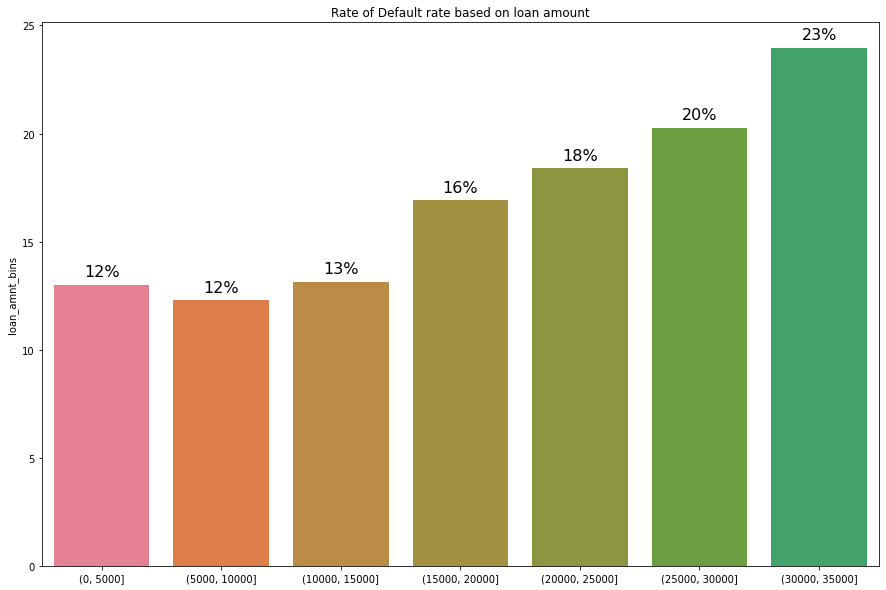

In [52]:
g= (final_loan[final_loan['loan_status']=='Charged Off'].loan_amnt_bins.value_counts()*100/final_loan.loan_amnt_bins.value_counts())
plt.figure(figsize=(15,10))
f = sb.barplot(g.index,g,palette=sb.color_palette('husl', 16))
f.set_title('Rate of Default rate based on loan amount')
show_values_on_bars(f)

### Analysis:

- Rate of default increases with increase in loan amount
    1. `23%` when loan amount is more than 30k
    2. `20%` When loan amount in bucket 25k - 20k
    3. `18%` when loan amount in bucket 20k-25k
- __Interest rate is directly proportional to Loan being charged off__ 

## Analysis using interest rate

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Interest Rate Distribution for Charged Off')

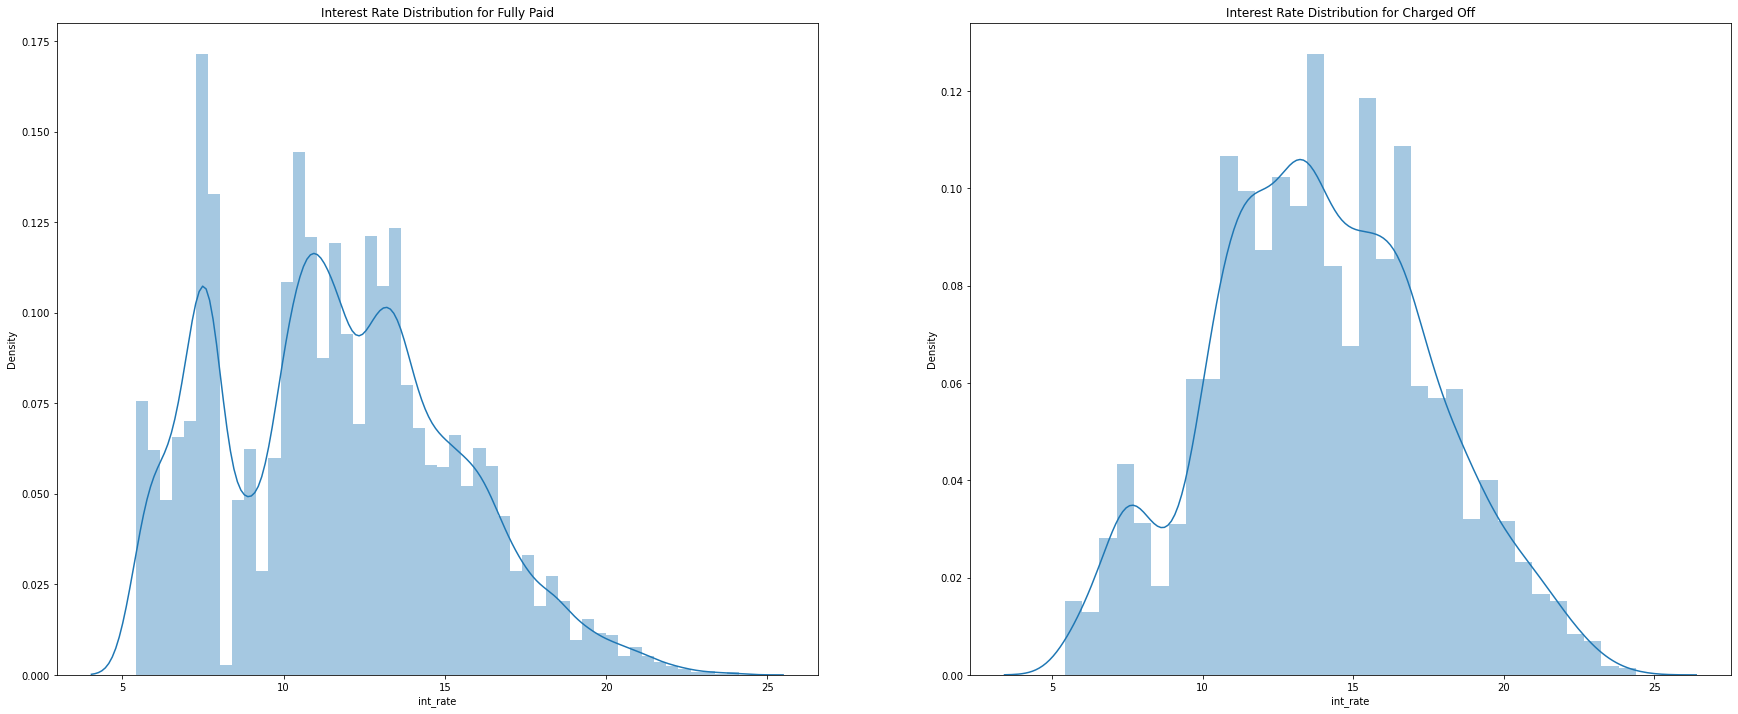

In [53]:
f,axes = plt.subplots(1,2,figsize=(30,12))
sb.distplot(final_loan[final_loan.loan_status=='Fully Paid'].int_rate,ax = axes[0])
sb.distplot(final_loan[final_loan.loan_status=='Charged Off'].int_rate,ax = axes[1])
axes[0].set_title("Interest Rate Distribution for Fully Paid")
axes[1].set_title("Interest Rate Distribution for Charged Off")


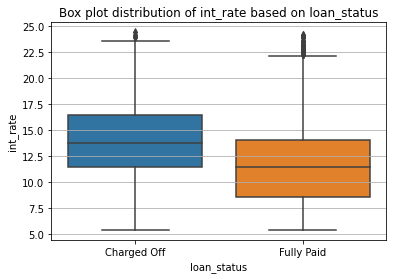

In [54]:
ax = sb.boxplot(x = final_loan.loan_status,y=final_loan.int_rate)
ax.set_title("Box plot distribution of int_rate based on loan_status")
plt.grid(axis='y')

In [55]:
final_loan.groupby(['loan_status']).int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.000,13.930,3.648,5.420,11.490,13.790,16.450,24.400
Fully Paid,30423.000,11.667,3.614,5.420,8.590,11.490,14.090,24.110


### Mean and median for `charged off` loans are higher than `fully paid` loan which makes it clear that loan defaulters `increase` with increasing in the interest rate

In [56]:
final_loan['int_rate_bucket'] = pd.cut(x=final_loan['int_rate'], bins=np.arange(0,25,8),labels=['low','medium','high'])

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


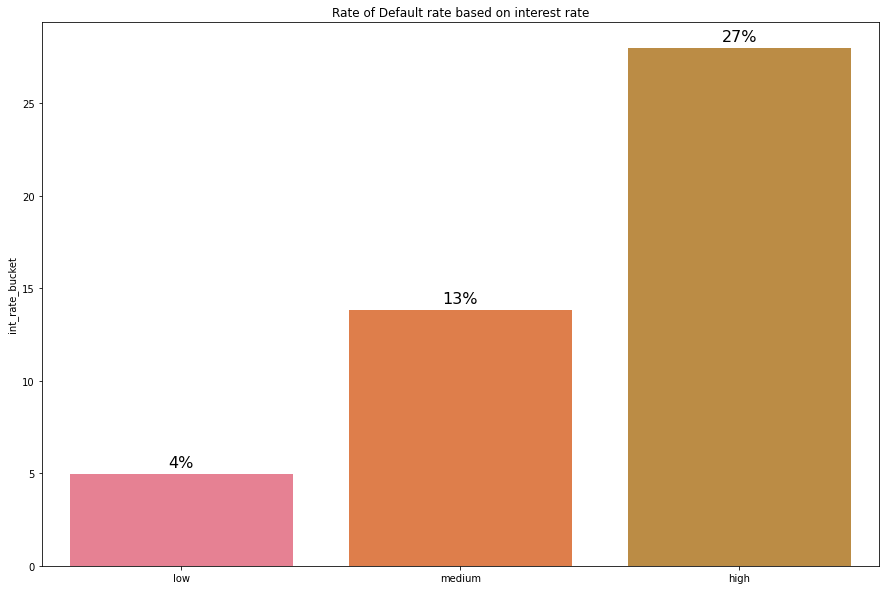

In [57]:
g= (final_loan[final_loan['loan_status']=='Charged Off'].int_rate_bucket.value_counts()*100/final_loan.int_rate_bucket.value_counts())
plt.figure(figsize=(15,10))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Rate of Default rate based on interest rate')
show_values_on_bars(f)

In [58]:
final_loan['int_rate_bins'] = pd.cut(x=final_loan['int_rate'], bins=np.arange(0,25,2.5))

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


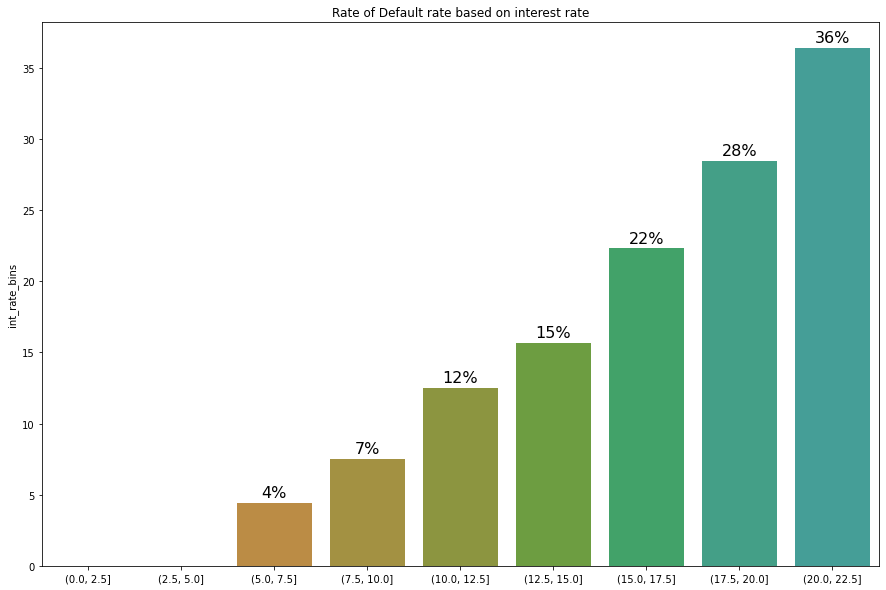

In [59]:
g= (final_loan[final_loan['loan_status']=='Charged Off'].int_rate_bins.value_counts()*100/final_loan.int_rate_bins.value_counts())
plt.figure(figsize=(15,10))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Rate of Default rate based on interest rate')
show_values_on_bars(f)

---
## Analysis
1. Rate of loan being charged off increases with increase in interest rate
2. This correlates with loan amount as the size of loan increases, risk associated increases resulting in higher interest rates therefore higher risk of loan being defaulted

__Increase in interest has direct impact on__

---

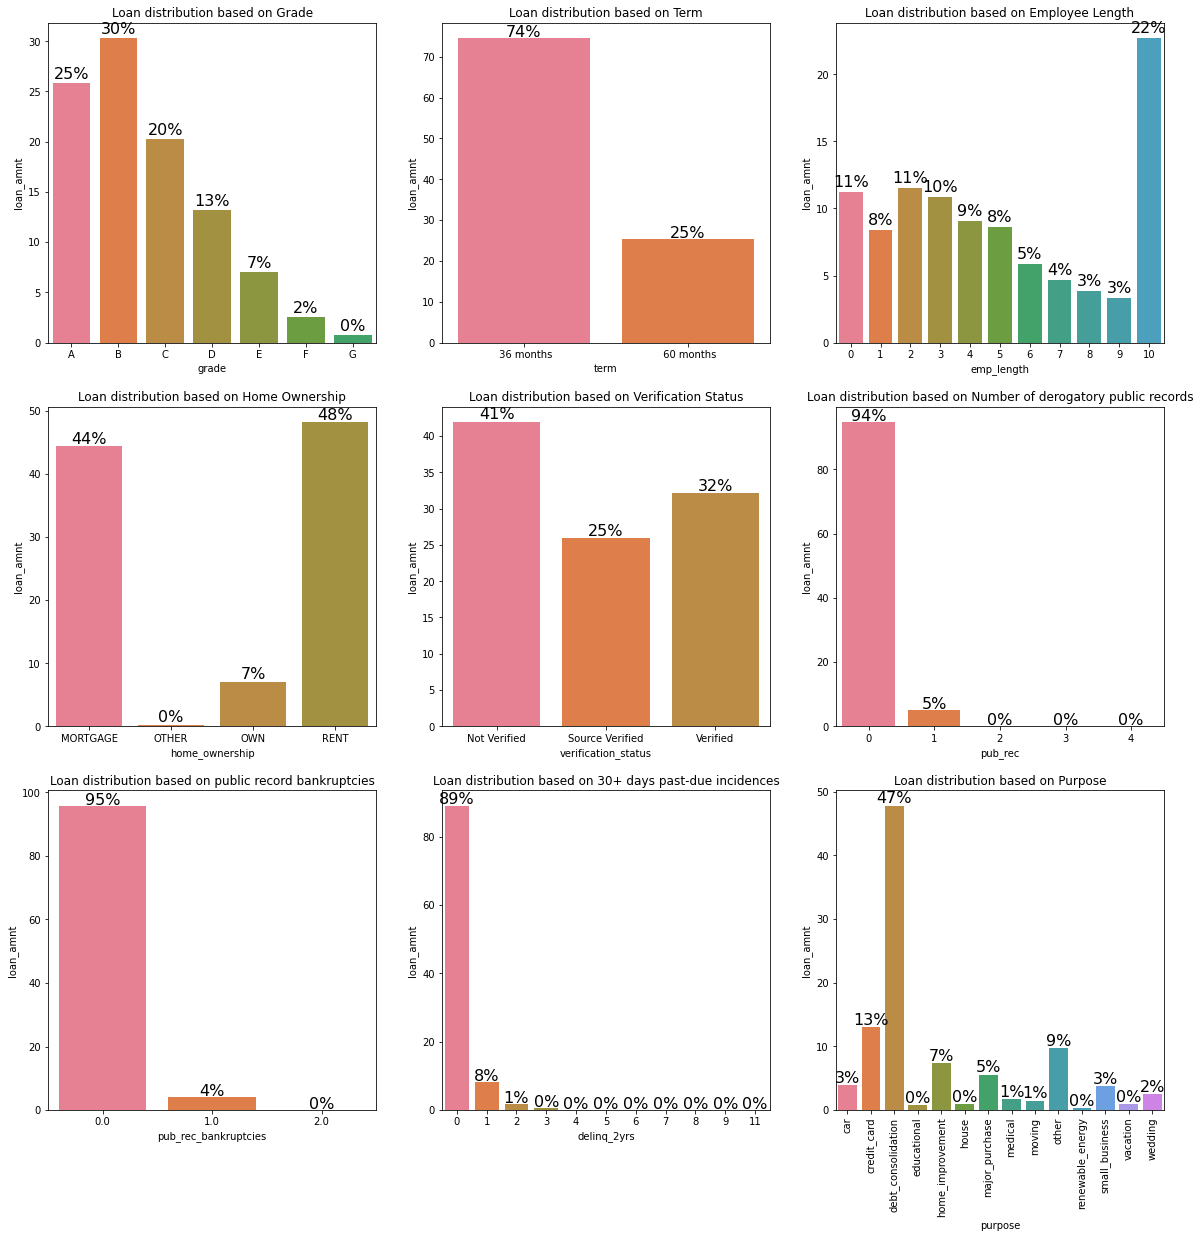

In [60]:
f,axes = plt.subplots(3,3,figsize=(20,20))
#Subplot - 1 Grade
plt.subplot(3,3,1)
g= (final_loan.groupby(['grade']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Grade')
show_values_on_bars(f)

#Subplot - 2 term
plt.subplot(3,3,2)
g= (final_loan.groupby(['term']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Term')
show_values_on_bars(f)

#Subplot - 3 term
plt.subplot(3,3,3)
g= (final_loan.groupby(['emp_length']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Employee Length')
show_values_on_bars(f)

#Subplot - 4 term
plt.subplot(3,3,4)
g= (final_loan.groupby(['home_ownership']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Home Ownership')
show_values_on_bars(f)

#Subplot - 5 term
plt.subplot(3,3,5)
g= (final_loan.groupby(['verification_status']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Verification Status')
show_values_on_bars(f)


#Subplot - 6 term
plt.subplot(3,3,6)
g= (final_loan.groupby(['pub_rec']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Number of derogatory public records')
show_values_on_bars(f)


#Subplot - 7 term
plt.subplot(3,3,7)
g= (final_loan.groupby(['pub_rec_bankruptcies']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on public record bankruptcies')
show_values_on_bars(f)

#Subplot - 8 term
plt.subplot(3,3,8)
g= (final_loan.groupby(['delinq_2yrs']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on 30+ days past-due incidences')
show_values_on_bars(f)


#Subplot - 9 term
plt.subplot(3,3,9)
g= (final_loan.groupby(['purpose']).loan_amnt.count()*100/len(final_loan))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Purpose')
f.set_xticklabels(labels = g.index,rotation=90)
show_values_on_bars(f)




---


## Observation : 

1. Most of the loans alloted are high grade loans
2. Most term length for loan is 36 months
3. Employees with experience more than 10 years seems to occupy majority of loans
4. Loans are mostly taken my people living on rent and morgages 
5. Majority of the loans to people do not have verified income source
6. Loan distribution is more on debt consolidation when compared to the other loans
7. Loans with public record of bankruptcies, 30+ days past due incidences and delegatory public records are mostly `0` 

---

---

## Let's perform univariate analysis on grades, term , employee_length, home_ownership, verification_status and purpose to understand how it effects charged off loans

---

## Attribute - Loan Grade

### Grades Analysis on charged off 

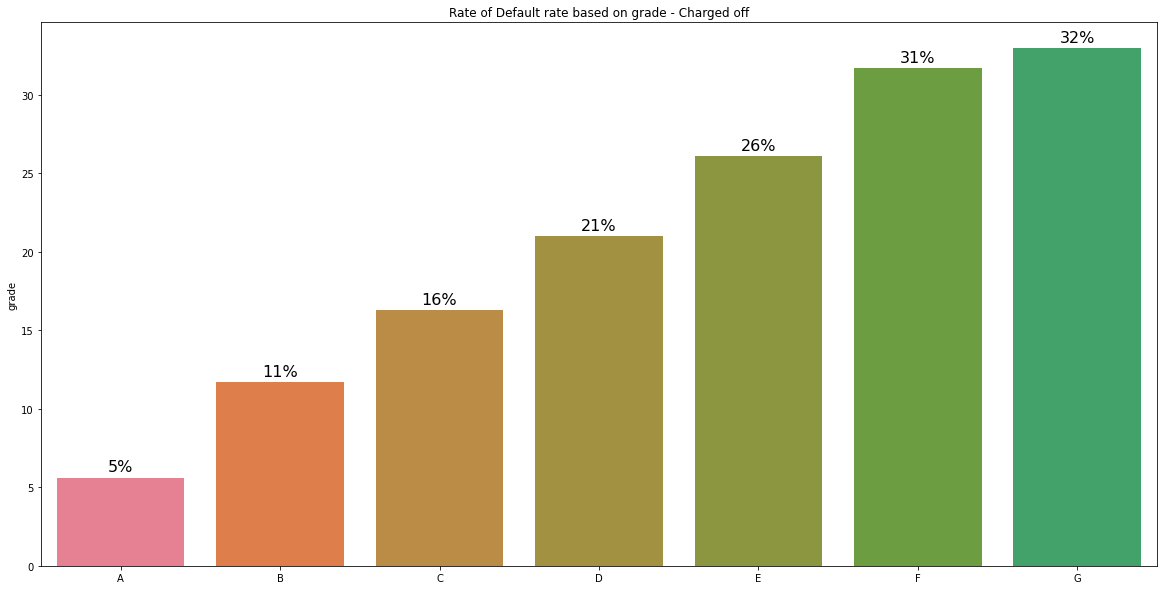

In [61]:
plt.figure(figsize=(20,10))
g= (final_loan[final_loan['loan_status']=='Charged Off'].grade.value_counts()*100/final_loan.grade.value_counts())
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Rate of Default rate based on grade - Charged off')
show_values_on_bars(f)

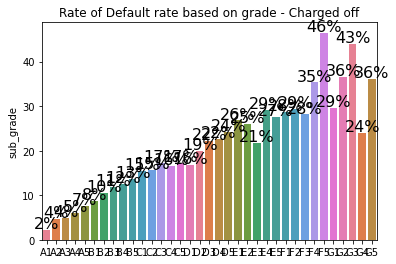

In [62]:
g= (final_loan[final_loan['loan_status']=='Charged Off'].sub_grade.value_counts()*100/final_loan.sub_grade.value_counts())
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Rate of Default rate based on grade - Charged off')
show_values_on_bars(f)

Text(0.5, 1.0, 'Annual Income distribution with grade')

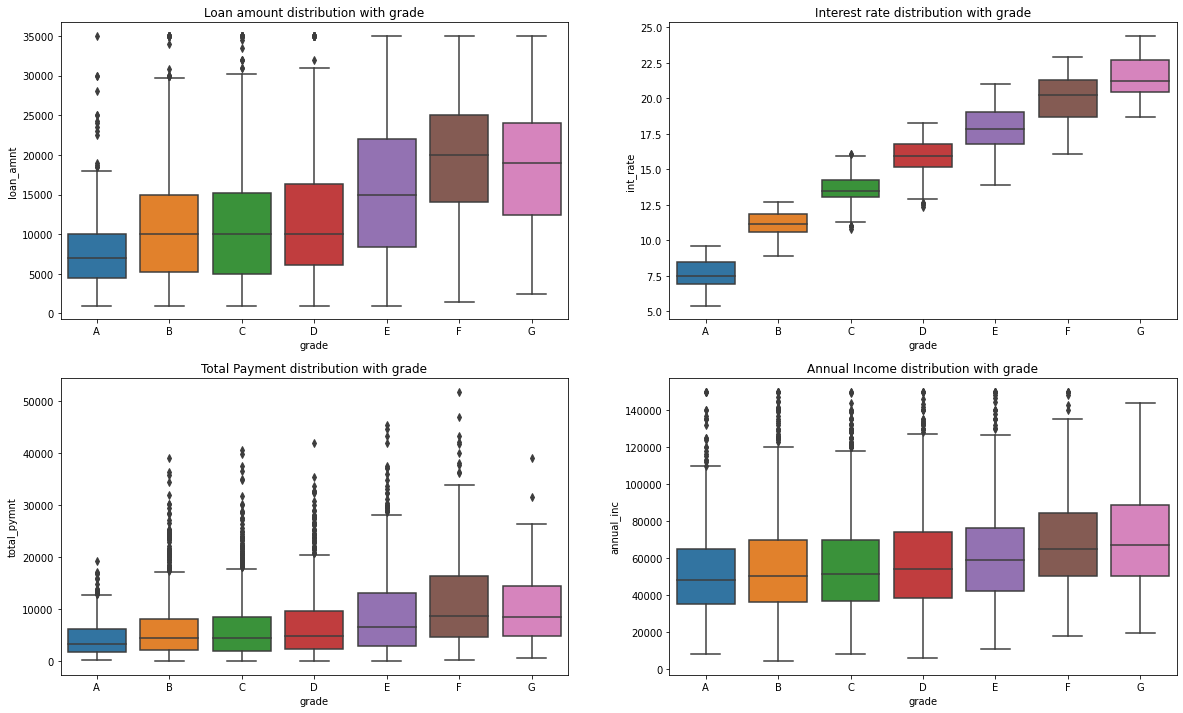

In [63]:
plt.subplots(2,2,figsize = (20,12))
plt.subplot(2,2,1)
ax = sb.boxplot(x = charged_off_loans.grade.sort_values(),y = charged_off_loans.loan_amnt)
ax.set_title("Loan amount distribution with grade")

plt.subplot(2,2,2)
ax = sb.boxplot(x = charged_off_loans.grade.sort_values(),y = charged_off_loans.int_rate)
ax.set_title("Interest rate distribution with grade")

plt.subplot(2,2,3)
ax = sb.boxplot(x = charged_off_loans.grade.sort_values(),y = charged_off_loans.total_pymnt)
ax.set_title("Total Payment distribution with grade")

plt.subplot(2,2,4)
ax = sb.boxplot(x = charged_off_loans.grade.sort_values(),y = charged_off_loans[charged_off_loans.annual_inc<=150000].annual_inc)
ax.set_title("Annual Income distribution with grade")


### Analysis - Grades:

1. The risk of charged off loans is very less for highly graded loans
2. As seen in the above box plot interest rate increases with decling grades due to higher risk
3. Similarly loan amount also increase with declining grades, so does annual income and total payment indicating higher risk associated with depreciating grades
3. The rate of loan defaulters increases with declining grades whuch can also be observed in sub grades

__Rate of default is inversly proportional to grade (i.e, with declining grades there is a chance of higher risk resulting in more chance the loan being default)__

__Recommendation__ : To approve loans for highly graded loans therefore reducing chance of credit risk

## Attribute - Employment Length

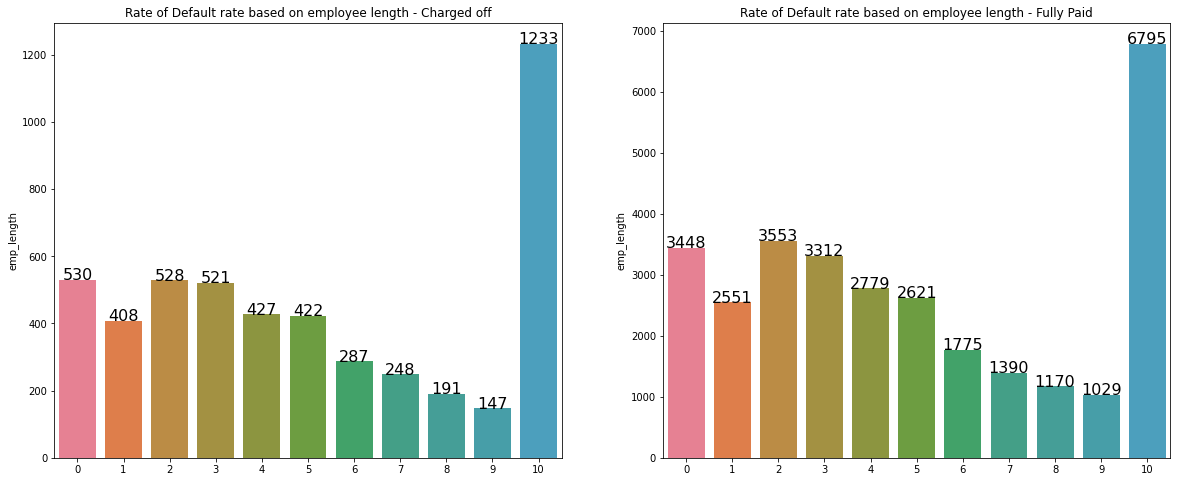

In [64]:
f,axes = plt.subplots(1,2,figsize=(20,8))
g= (charged_off_loans.emp_length.value_counts())
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax =axes[0])
f.set_title('Rate of Default rate based on employee length - Charged off')
show_values_on_bars(f,percent=False) 

g= (fully_paid_loans.emp_length.value_counts())
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax =axes[1])
f.set_title('Rate of Default rate based on employee length - Fully Paid')
show_values_on_bars(f,percent = False) 




### Analysis - Employment Length

1. Effect of employment length on loan status follows a similar trend in both Fully paid and charged off
2. People with employment length more than 10 years have highest percentage of fully paid loans similary they even have highest amount of charged off loans
3. __No impact of employment length on loan default__

## Attribute - Home Ownership

#### Understanding home_ownership data

In [65]:
final_loan.home_ownership.value_counts()

RENT        17065
MORTGAGE    15701
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

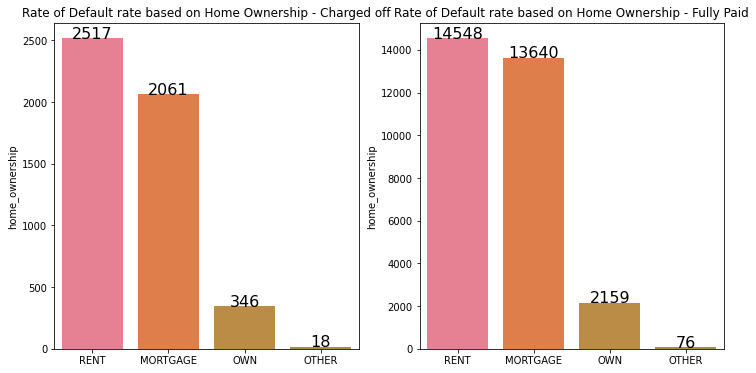

In [66]:
f,axes = plt.subplots(1,2,figsize=(12,6))
g= (charged_off_loans.home_ownership.value_counts())
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax =axes[0])
f.set_title('Rate of Default rate based on Home Ownership - Charged off')
show_values_on_bars(f,percent=False) 

g= (fully_paid_loans.home_ownership.value_counts())
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax =axes[1])
f.set_title('Rate of Default rate based on Home Ownership - Fully Paid')
show_values_on_bars(f,percent = False) 

## Analysis - Home Ownership

__No impact of employment length on loan default__

__Reason__ : 
Loans follow a similar trend for different home ownership types

## Attribute - Loan Purpose

In [67]:
final_loan.purpose.value_counts().sort_values(ascending=False)


debt_consolidation    16909
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

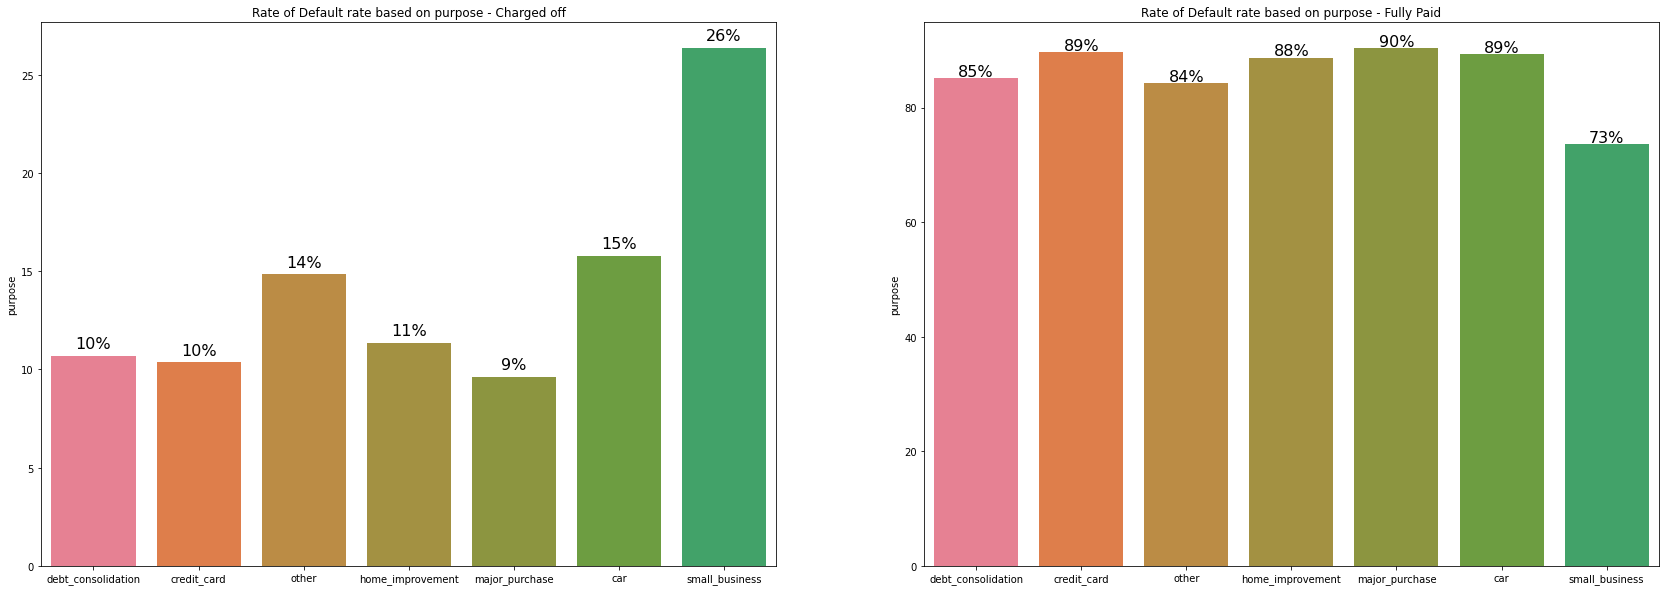

In [68]:
f,axes= plt.subplots(1,2,figsize=(29,10))
top7_purpose = final_loan.purpose.value_counts().sort_values(ascending=False)[:7]
ax1 = charged_off_loans[charged_off_loans.purpose.isin(list(top7_purpose.index))].purpose.value_counts()*100/final_loan[final_loan.purpose.isin(list(top7_purpose.index))].purpose.value_counts()
ax2 = fully_paid_loans[fully_paid_loans.purpose.isin(list(top7_purpose.index))].purpose.value_counts()*100/final_loan[final_loan.purpose.isin(list(top7_purpose.index))].purpose.value_counts()

g1 = sb.barplot(x = top7_purpose.index,y = ax1 ,palette=sb.color_palette('husl', 16),ax = axes[0])

g2 = sb.barplot(x = top7_purpose.index,y = ax2 ,palette=sb.color_palette('husl', 16),ax = axes[1])

g1.set_title('Rate of Default rate based on purpose - Charged off')
g2.set_title('Rate of Default rate based on purpose - Fully Paid')

show_values_on_bars(g1)
show_values_on_bars(g2)


---
### Analysis 

- `small business` have significant impact of `26%` on loan being charged off.
- This is also proved by measure of fully paid loans where small loans only contribute `73%` fully paid when compared to other purposes which are well above `85%`

---


## Attribute Loan Term

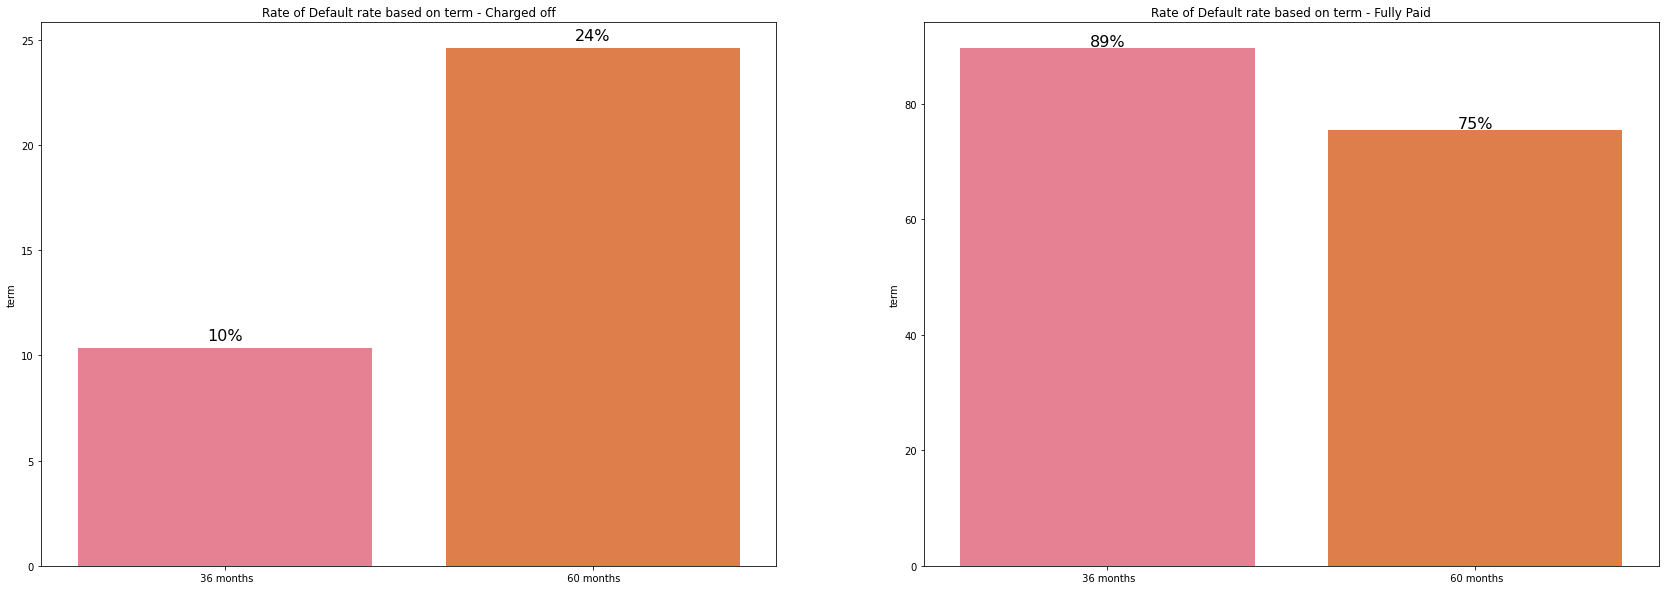

In [69]:
f,axes= plt.subplots(1,2,figsize=(29,10))
ax1 = charged_off_loans.term.value_counts()*100/final_loan.term.value_counts()
ax2 = fully_paid_loans.term.value_counts()*100/final_loan.term.value_counts()
term_list = charged_off_loans.term.value_counts().index
g1 = sb.barplot(x = term_list,y = ax1 ,palette=sb.color_palette('husl', 16),ax = axes[0])

g2 = sb.barplot(x = term_list,y = ax2 ,palette=sb.color_palette('husl', 16),ax = axes[1])

g1.set_title('Rate of Default rate based on term - Charged off')
g2.set_title('Rate of Default rate based on term - Fully Paid')

show_values_on_bars(g1)
show_values_on_bars(g2)

---

## Analysis - Term

- Above visualisation suggests rate of default goes higher as the loan duration increases
- Rate of default rises for __36 months__ is at `10%` which rises to `24%` at __60 months__ suggesting increase in default rate with increase in loan period
- Also rate of fully paid falls down by `14%` when the term duration increases

#### `There is a direct impact of loan duration on default rate`
----

## Attribute -  pub_rec_bankruptcy

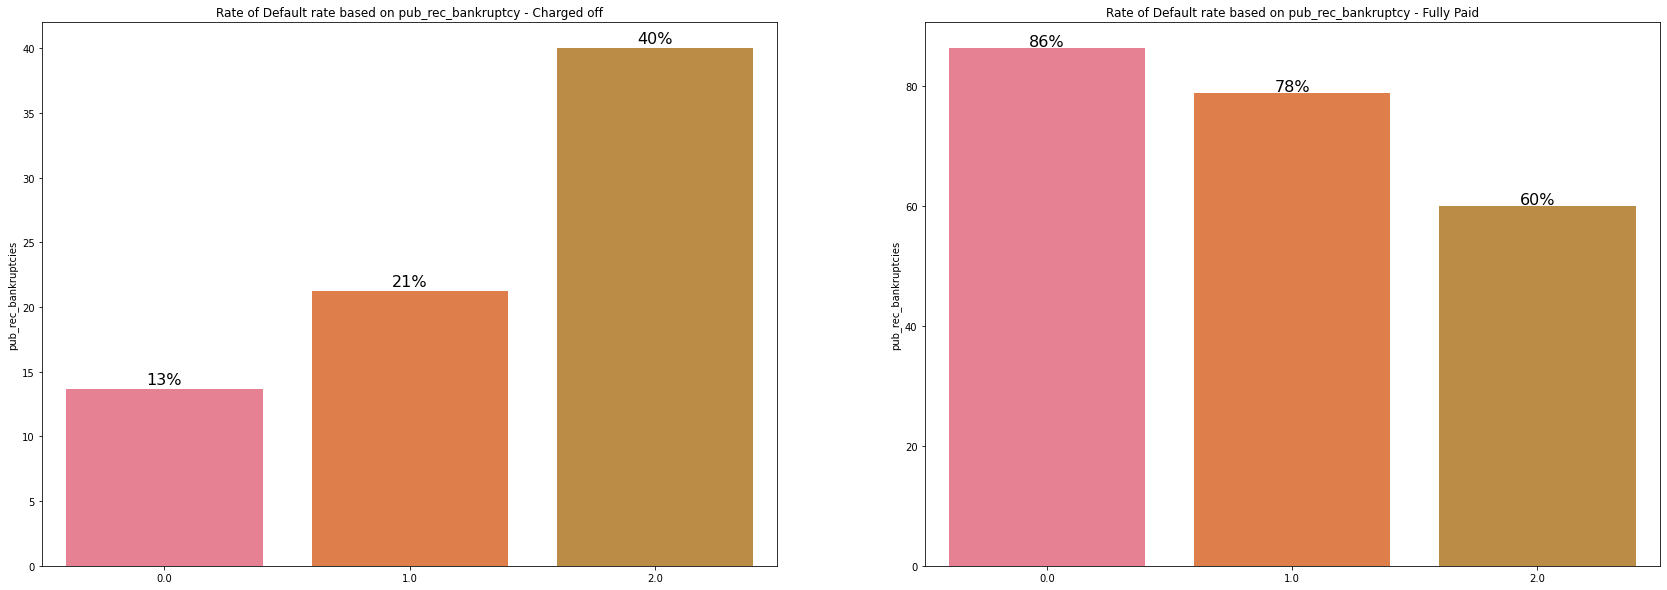

In [70]:
f,axes= plt.subplots(1,2,figsize=(29,10))
ax1 = charged_off_loans.pub_rec_bankruptcies.value_counts()*100/final_loan.pub_rec_bankruptcies.value_counts()
ax2 = fully_paid_loans.pub_rec_bankruptcies.value_counts()*100/final_loan.pub_rec_bankruptcies.value_counts()
pub_rec_bankruptcies_list = final_loan.pub_rec_bankruptcies.value_counts().index
g1 = sb.barplot(x = pub_rec_bankruptcies_list,y = ax1 ,palette=sb.color_palette('husl', 16),ax = axes[0])

g2 = sb.barplot(x = pub_rec_bankruptcies_list,y = ax2 ,palette=sb.color_palette('husl', 16),ax = axes[1])

g1.set_title('Rate of Default rate based on pub_rec_bankruptcy - Charged off')
g2.set_title('Rate of Default rate based on pub_rec_bankruptcy - Fully Paid')

show_values_on_bars(g1)
show_values_on_bars(g2)

---
## Analysis  - pub_rec_bankruptcy and pub_rec

1. __The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.__
2. Similar can also be observed in fully paid loans where the percentage keeps declining with increasing number of bankruptcies
---

## Attribute - pub_rec

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


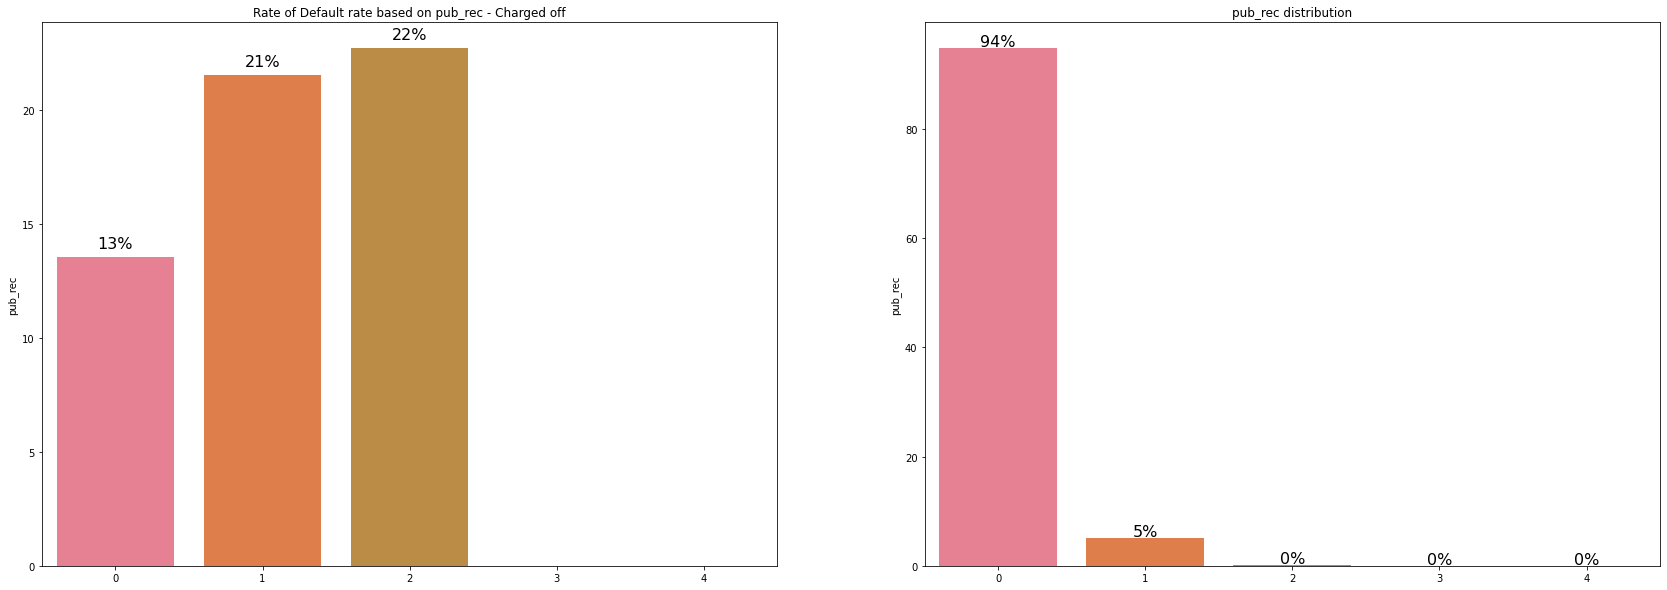

In [71]:
f,axes= plt.subplots(1,2,figsize=(29,10))
ax1 = charged_off_loans.pub_rec.value_counts()*100/final_loan.pub_rec.value_counts()
ax2 = final_loan.pub_rec.value_counts()*100/len(final_loan)
pub_rec_list = final_loan.pub_rec.value_counts().index
g1 = sb.barplot(x = pub_rec_list,y = ax1 ,palette=sb.color_palette('husl', 16),ax = axes[0])

g2 = sb.barplot(x = pub_rec_list,y = ax2 ,palette=sb.color_palette('husl', 16),ax = axes[1])

g1.set_title('Rate of Default rate based on pub_rec - Charged off')
g2.set_title('pub_rec distribution')

show_values_on_bars(g1)
show_values_on_bars(g2)


---
## Analysis  - pub_rec_bankruptcy and pub_rec

1. __The rate of default increases with increase in Number of derogatory public records.__
2. `94%` of people do not have any deregatory records, `5%` of people have deregatory records.
---

## Attribute DTI

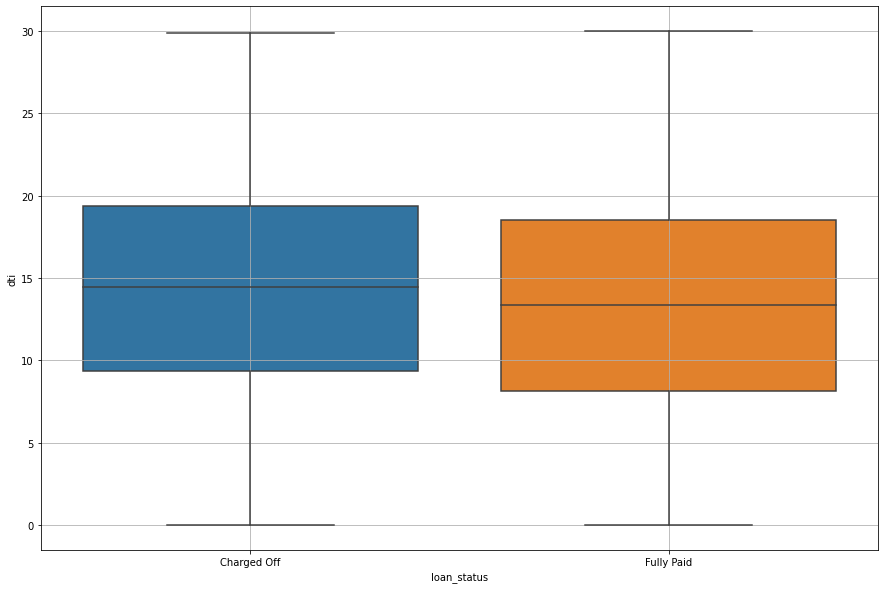

In [72]:
plt.figure(figsize=(15,10))
sb.boxplot(x = 'loan_status', y = 'dti',data = final_loan)

plt.grid()

### As observed dti distribution for charged off loans are slightly higher

In [73]:
final_loan.dti.describe()

count   35365.000
mean       13.404
std         6.637
min         0.000
25%         8.320
50%        13.500
75%        18.640
max        29.990
Name: dti, dtype: float64

In [74]:
final_loan.groupby(['loan_status']).dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4942.000,14.161,6.523,0.000,9.352,14.440,19.340,29.850
Fully Paid,30423.000,13.281,6.647,0.000,8.160,13.350,18.530,29.990


In [75]:
final_loan['dti_bucket'] = pd.cut(x = final_loan.dti,bins=np.arange(0,30,5))

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


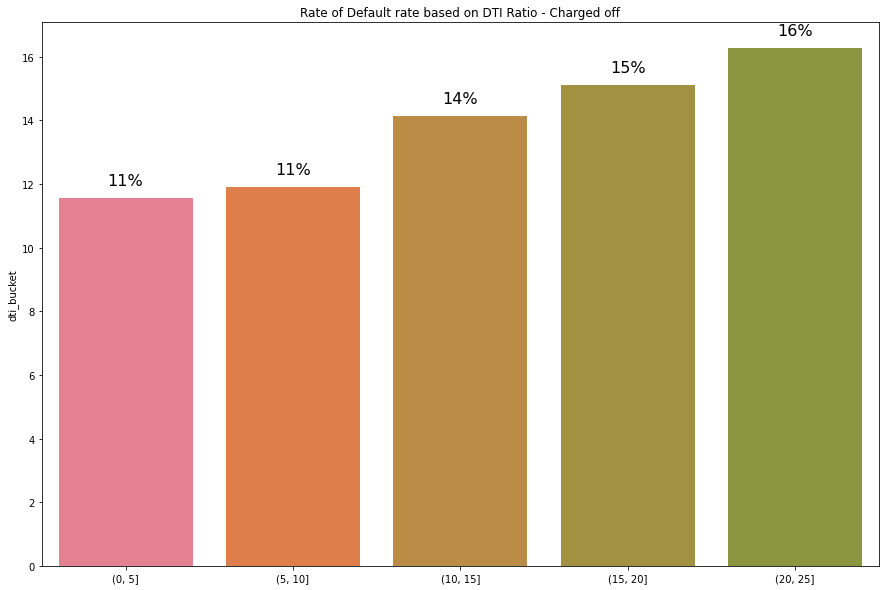

In [76]:
g= (final_loan[final_loan['loan_status']=='Charged Off'].dti_bucket.value_counts()*100/final_loan.dti_bucket.value_counts())
plt.figure(figsize=(15,10))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Rate of Default rate based on DTI Ratio - Charged off')
show_values_on_bars(f)

---

## Analysis - DTI
1. It is clear that with increasing __dti__ the rate of default also increases
2. High DTI ratio can signal that an individual has too much debt for the amount of income earned each month which explain the reason for to default
3. Higher the dti higher the chances of loan being Charged Off

---

## Attribute - Annual Income

In [77]:
final_loan.annual_inc.describe()

count     35365.000
mean      69097.740
std       63968.429
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     6000000.000
Name: annual_inc, dtype: float64

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='annual_inc'>

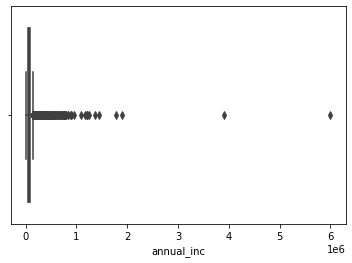

In [78]:
sb.boxplot(final_loan.annual_inc)

#### As we can see from above distribution, there are many outliers effecting the overall data
Filtering out data with less income outliers


In [79]:
df = final_loan[final_loan.annual_inc<1300000]

### Creating income bins similar to int_rate and loan amount to understand the rate of default in each income bin by using median as bin range

In [80]:
df['annual_inc_bins'] = pd.cut(x=df['annual_inc'], bins=np.arange(0,max(df['annual_inc']),60000))

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df['annual_inc_bins'].value_counts()

(0.0, 60000.0]            18939
(60000.0, 120000.0]       13572
(120000.0, 180000.0]       2133
(180000.0, 240000.0]        414
(240000.0, 300000.0]        158
(300000.0, 360000.0]         57
(360000.0, 420000.0]         21
(720000.0, 780000.0]         11
(420000.0, 480000.0]         10
(480000.0, 540000.0]          9
(540000.0, 600000.0]          9
(600000.0, 660000.0]          5
(660000.0, 720000.0]          5
(840000.0, 900000.0]          5
(1140000.0, 1200000.0]        5
(780000.0, 840000.0]          3
(900000.0, 960000.0]          1
(1020000.0, 1080000.0]        1
(1080000.0, 1140000.0]        0
(960000.0, 1020000.0]         0
Name: annual_inc_bins, dtype: int64

As we can see most of the bins above `1 million` are empty, so limiting the bins with bin value less than 1 million

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


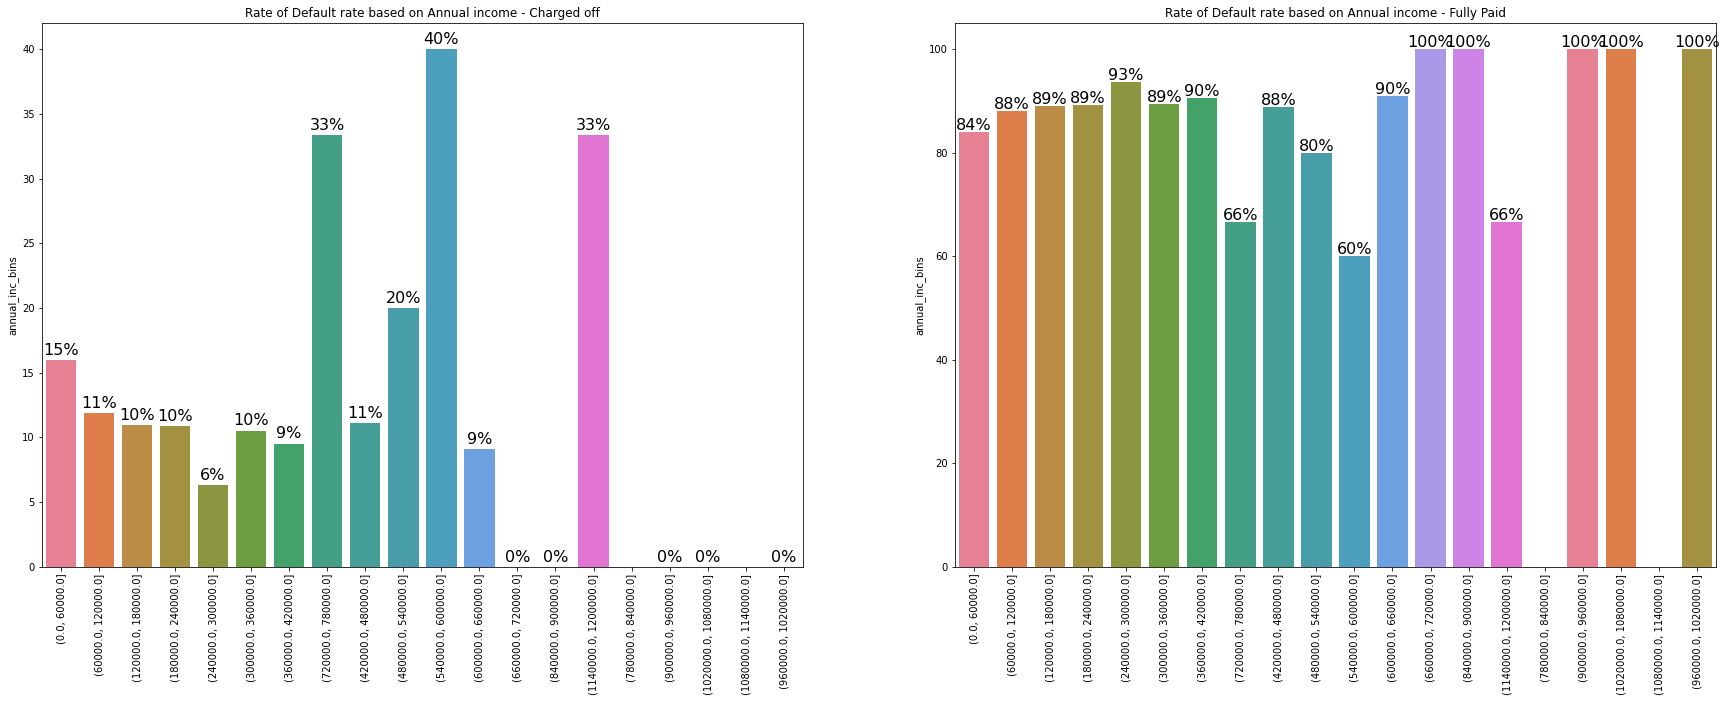

In [82]:
f,axes = plt.subplots(1,2,figsize=(30,10))
ax1 = df[df.loan_status=='Charged Off'].annual_inc_bins.value_counts()*100/df.annual_inc_bins.value_counts()
ax2 = df[df.loan_status=='Fully Paid'].annual_inc_bins.value_counts()*100/df.annual_inc_bins.value_counts()
annual_inc_bins_list = df.annual_inc_bins.value_counts().index
g1 = sb.barplot(x = annual_inc_bins_list,y = ax1 ,palette=sb.color_palette('husl', 16),ax = axes[0])
g2 = sb.barplot(x = annual_inc_bins_list,y = ax2 ,palette=sb.color_palette('husl', 16),ax = axes[1])
g1.set_xticklabels(labels = annual_inc_bins_list,rotation=90)
g2.set_xticklabels(labels = annual_inc_bins_list,rotation=90)
g1.set_title('Rate of Default rate based on Annual income - Charged off')
g2.set_title('Rate of Default rate based on Annual income - Fully Paid')

show_values_on_bars(g1)
show_values_on_bars(g2)

## Analysis
1. People with higher income generally tend to fully pay the loan amounts 
2. People with lesser income are more tend to default
3. Unique outlier in visualisation suggests that people with income in the rage 540k-600k tend to default significantly higher(`40%`) than other income ranges

## Attribute issue_d

In [83]:
final_loan.issue_d.dt.year.value_counts()

2011    19090
2010    10795
2009     4423
2008     1053
2007        4
Name: issue_d, dtype: int64

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


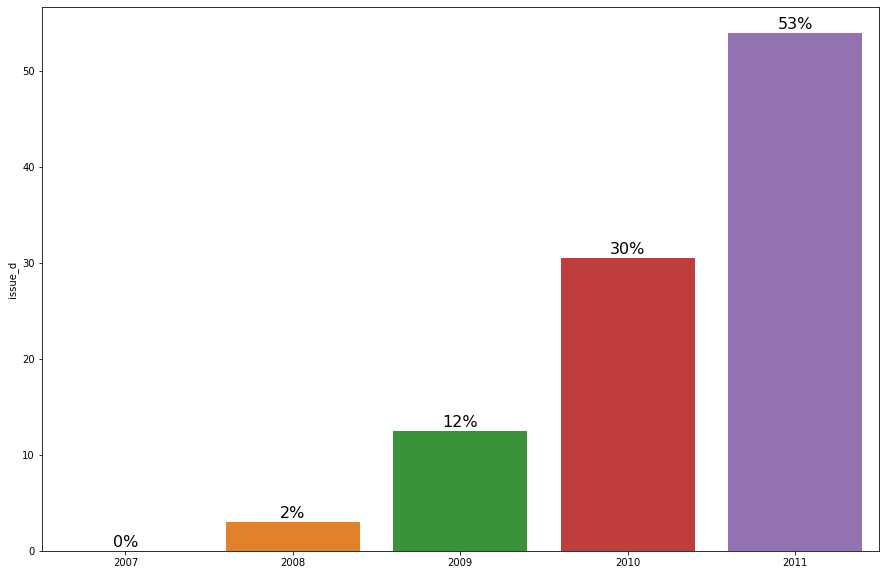

In [84]:
plt.figure(figsize=(15,10))
g = sb.barplot(final_loan.issue_d.dt.year.value_counts().index,final_loan.issue_d.dt.year.value_counts()*100/len(final_loan))
show_values_on_bars(g)

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


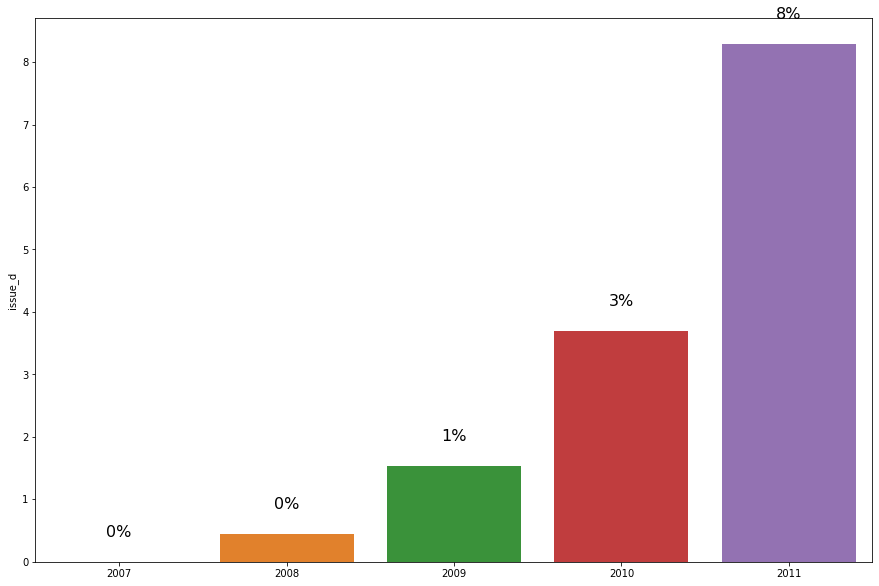

In [85]:
plt.figure(figsize=(15,10))
g = sb.barplot(charged_off_loans.issue_d.dt.year.value_counts().index,charged_off_loans.issue_d.dt.year.value_counts()*100/len(final_loan))
show_values_on_bars(g)

## Analysis
1. Year of loan has no significant effect on likelihood of default. 
2. No. of loans increase every year so does like hood default due to increase in volume of loans

## Attribute - Address State

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='addr_state', ylabel='count'>

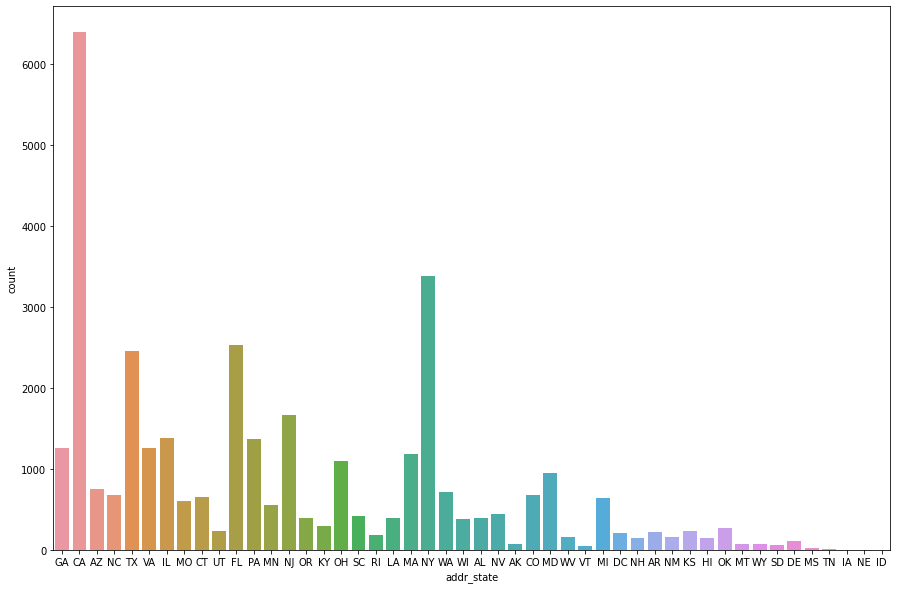

In [86]:
plt.figure(figsize=(15,10))

sb.countplot(final_loan.addr_state)

#### No of loans is significantly higher for CA, NY, FL and TX

Effect of these loans on rate of default

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rate of Default rate based on State - Fully Paid')

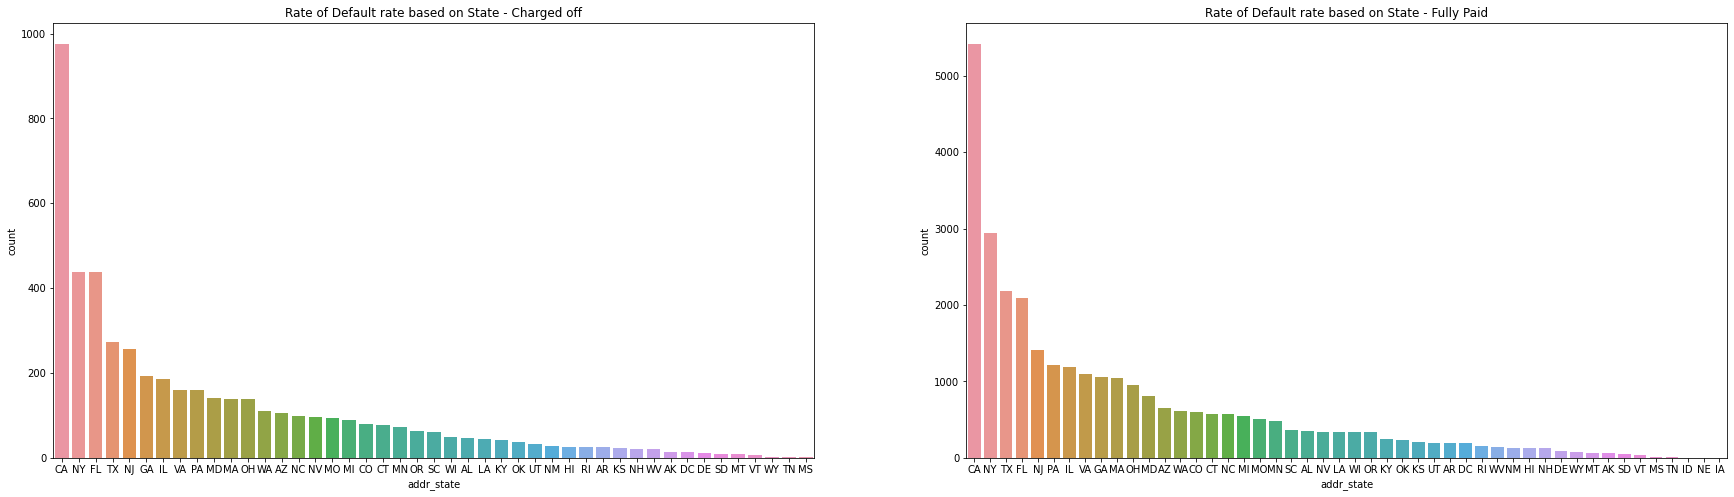

In [87]:
f,axes = plt.subplots(1,2,figsize=(30,8))
g1 = sb.countplot(charged_off_loans.addr_state,ax = axes[0],order = charged_off_loans.addr_state.value_counts().index)
g2 = sb.countplot(fully_paid_loans.addr_state,ax = axes[1],order = fully_paid_loans.addr_state.value_counts().index)
g1.set_title('Rate of Default rate based on State - Charged off')
g2.set_title('Rate of Default rate based on State - Fully Paid')

---
## Analysis

`No impact of state on rate of default as volume of loans alloted in these top states also have highest rate of default`

---

## Attribute - revol_util

In [88]:
final_loan.revol_util.describe()

count   35365.000
mean       49.139
std        28.228
min         0.000
25%        25.900
50%        49.700
75%        72.600
max        99.900
Name: revol_util, dtype: float64

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='revol_util'>

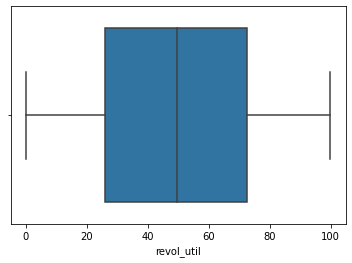

In [89]:
sb.boxplot(final_loan.revol_util)

In [90]:
final_loan['revol_util_bins'] = pd.cut(x=final_loan['revol_util'], bins=np.arange(0,100,10))

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


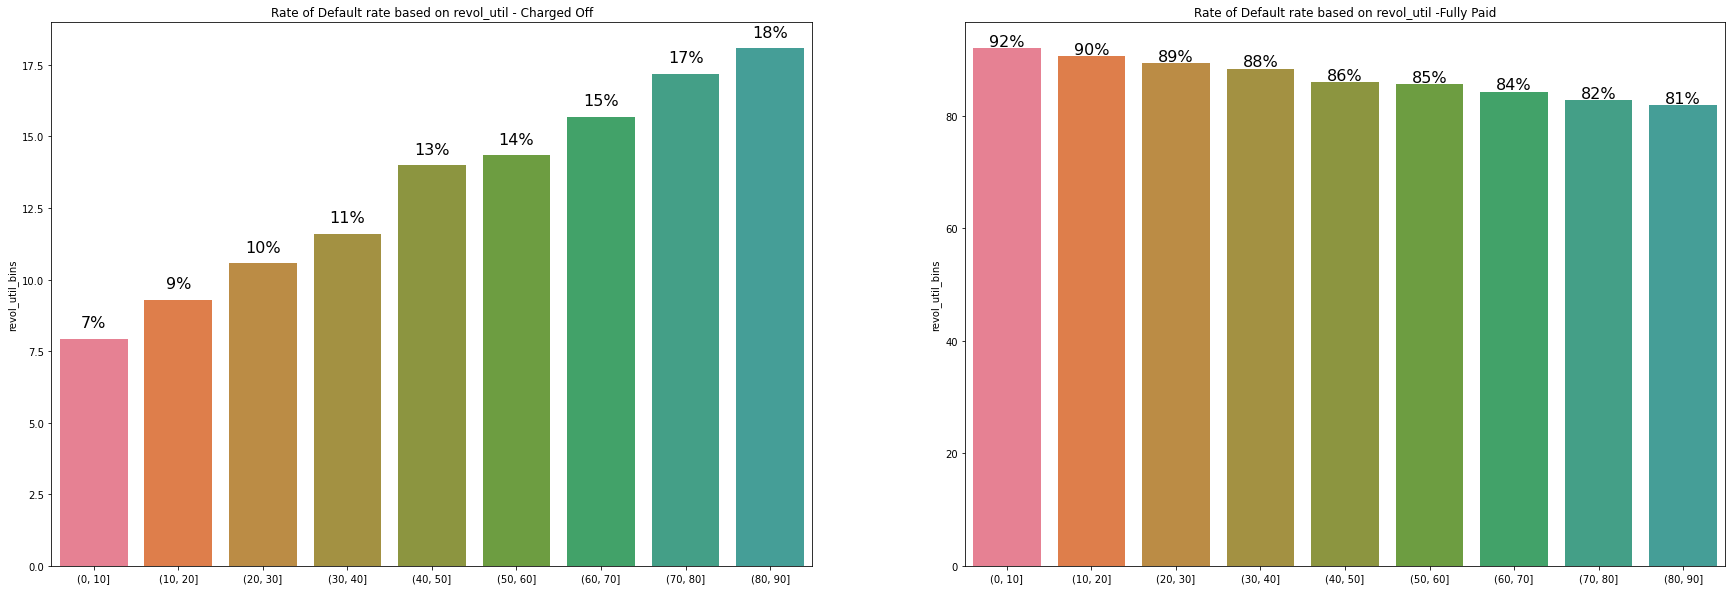

In [91]:
f,axes = plt.subplots(1,2,figsize=(30,10))
g= (final_loan[final_loan['loan_status']=='Charged Off'].revol_util_bins.value_counts()*100/final_loan.revol_util_bins.value_counts())

f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax = axes[0])
show_values_on_bars(f)

f.set_title('Rate of Default rate based on revol_util - Charged Off')
g= (final_loan[final_loan['loan_status']=='Fully Paid'].revol_util_bins.value_counts()*100/final_loan.revol_util_bins.value_counts())

f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax = axes[1])
f.set_title('Rate of Default rate based on revol_util -Fully Paid')
show_values_on_bars(f)

## Analysis - revol_util
---
1. Rate of default increase with increase in the amount of credit the borrower is using relative to all available revolving credit
2. Which can also be observed in fully paid loans the rate of fully paid loans keep decreasing with increase revolving credit
---

## Attribute - open_acc

In [92]:
final_loan.open_acc.describe()

count   35365.000
mean        9.332
std         4.375
min         2.000
25%         6.000
50%         9.000
75%        12.000
max        44.000
Name: open_acc, dtype: float64

In [93]:
final_loan.open_acc.value_counts()

7     3584
6     3519
8     3506
9     3341
10    2863
5     2815
11    2485
12    2055
4     2041
13    1708
14    1327
3     1293
15    1069
16     847
17     658
18     489
2      477
19     361
20     263
21     222
22     128
23      83
24      64
25      50
26      29
28      22
27      20
30      13
29      12
34       5
31       5
33       3
32       2
36       2
35       1
38       1
39       1
44       1
Name: open_acc, dtype: int64

In [94]:
final_loan['open_acc_bins'] = pd.cut(x=final_loan['open_acc'], bins=np.arange(0,45,5))

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


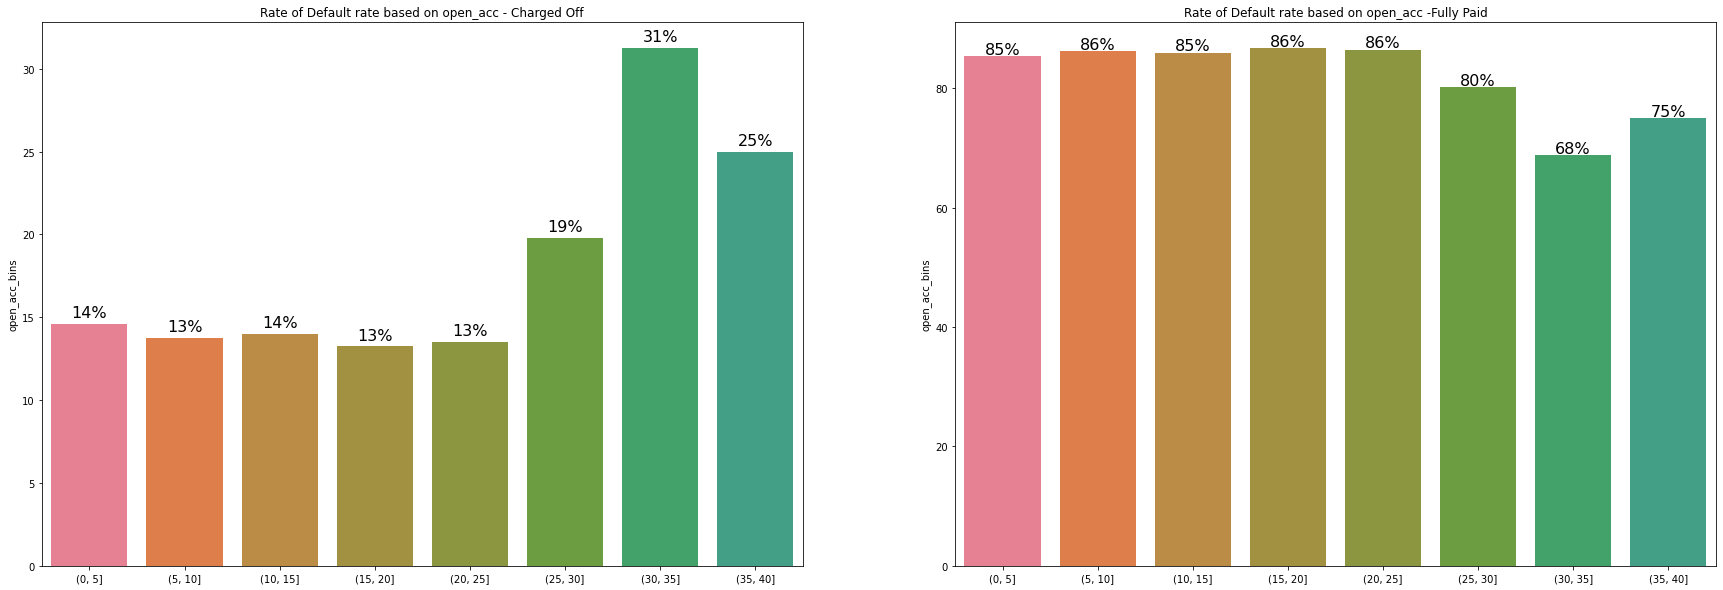

In [95]:
f,axes = plt.subplots(1,2,figsize=(30,10))
g= (final_loan[final_loan['loan_status']=='Charged Off'].open_acc_bins.value_counts()*100/final_loan.open_acc_bins.value_counts())

f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax = axes[0])
show_values_on_bars(f)

f.set_title('Rate of Default rate based on open_acc - Charged Off')
g= (final_loan[final_loan['loan_status']=='Fully Paid'].open_acc_bins.value_counts()*100/final_loan.open_acc_bins.value_counts())

f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax = axes[1])
f.set_title('Rate of Default rate based on open_acc -Fully Paid')
show_values_on_bars(f)

## Analysis - open_acc
---
1. Rate of default increase significantly when the number of open credit lines in the borrower's credit file is over `25`
2. Similarly this can also be observed in fully paid loans the rate of fully paid loans keep decreasing towards the end with increase in credit line
---

## Attribute - delinq_2yrs

In [96]:
final_loan.delinq_2yrs.value_counts()

0     31531
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


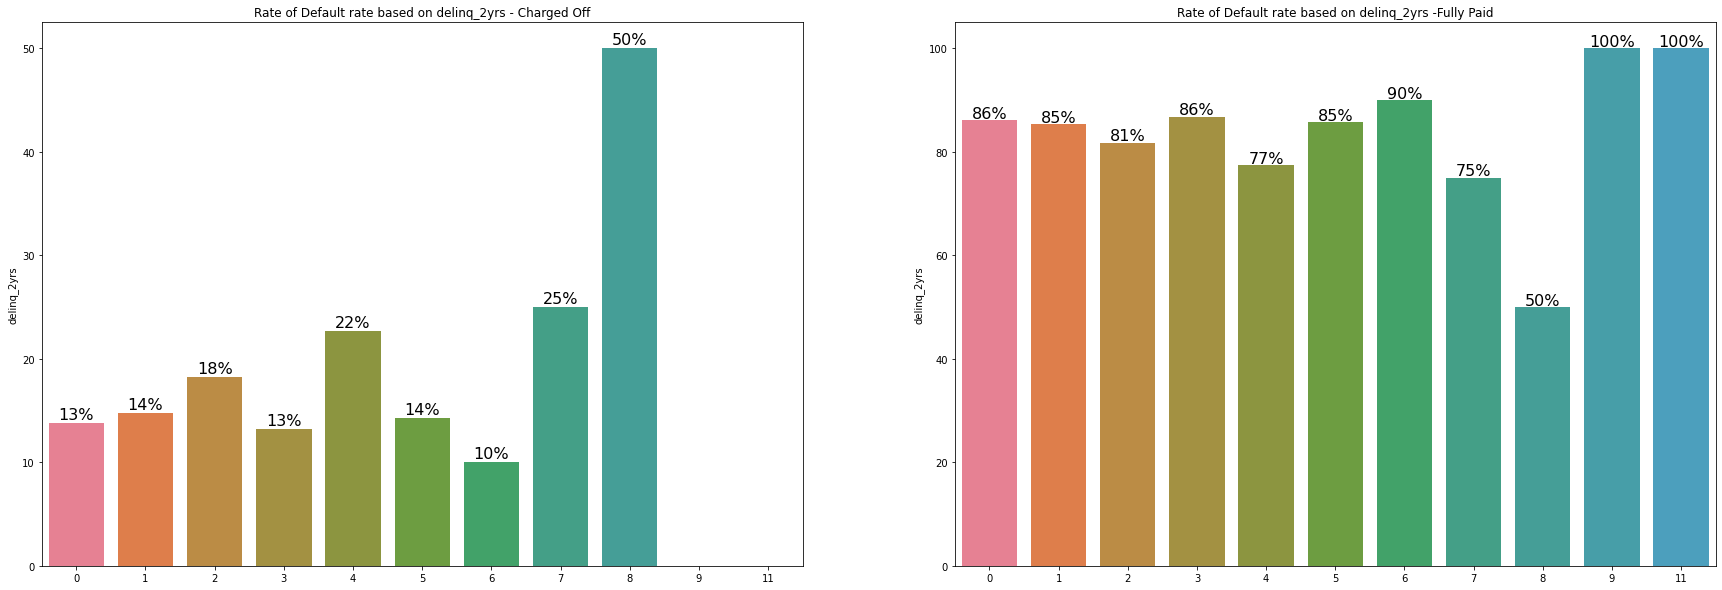

In [97]:
f,axes = plt.subplots(1,2,figsize=(30,10))
g= (final_loan[final_loan['loan_status']=='Charged Off'].delinq_2yrs.value_counts()*100/final_loan.delinq_2yrs.value_counts())

f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax = axes[0])
show_values_on_bars(f)

f.set_title('Rate of Default rate based on delinq_2yrs - Charged Off')
g= (final_loan[final_loan['loan_status']=='Fully Paid'].delinq_2yrs.value_counts()*100/final_loan.delinq_2yrs.value_counts())

f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16),ax = axes[1])
f.set_title('Rate of Default rate based on delinq_2yrs -Fully Paid')
show_values_on_bars(f)

## Analysis - delinq_2yrs
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
There are higher chances of default if this variable is greater than 1.

---
# Univariate Analysis Summary
---

### Important attributes contributing to rate of default : 

1.	__Loan Amount__
        - With increase in loan amount as the risk associated increase therefore rate of default also increases
        


2.	__Interest Rate__
        - Interest rate are strong factors for charged off loans as they determined by many attributes such as grade, loan amount, type 
        - These attributes provide information on risk associated with the loans therefore when the risk increase, there is significant increase in interest rate with which the rate of default also increase
        


3.	__Grade/ Sub-grade__
        - Grade suggests quality of the loans
        - Higher the grade, safer it is as it is most likely to be fully paid.
        - Declining grade suggests increase in rate of default
        


4.	__Purpose – Small Business__
        - After visualising the data loans from small business tend to default more
        - Few possible reasons being consistent source of income is not guaranteed
        


5.	__DTI__
        - DTI ratio =  `Total of Monthly Debt Payments/gross monthly income` 
        - Rate of default tend to increase with increase in dti ratio 
        - High DTI ratio can signal that an individual has too much debt for the amount of income earned each month which explain the reason for to default
        


6.	__Annual income__
        - People with lesser income are more likely to default as the loan to savings ratio gets smaller and are mostly likely to default as the debt keeps increasing
        


7.	__Term__
        - Rate of default rises for 36 months is at 10% which rises to 24% at 60 months suggesting increase in default rate with increase in loan period
        - Also rate of fully paid falls down by 14% when the term duration increases
        


8.	__Revol_util__
        - Rate of default increase with increase in the amount of credit the borrower is using relative to all available revolving credit
        - Which can also be observed in fully paid loans the rate of fully paid loans keep decreasing with increase revolving credit
        


9.	__Open_acc__
        - Rate of default increase significantly when the number of open credit lines in the borrower's credit file is over 25
        - Similarly this can also be observed in fully paid loans the rate of fully paid loans keep decreasing towards the end with increase in credit line


---

# Bivariate Analysis

---

## Attribute loan_amount and annual_inc

In [98]:
final_loan.annual_inc.describe()

count     35365.000
mean      69097.740
std       63968.429
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     6000000.000
Name: annual_inc, dtype: float64

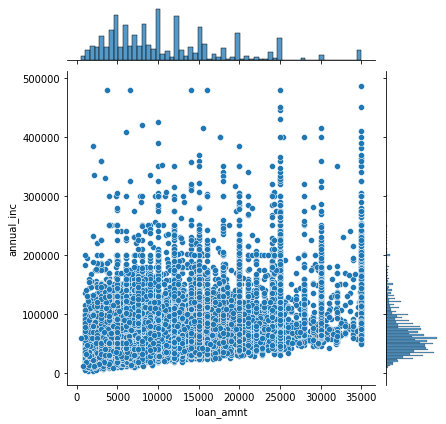

In [99]:
f = sb.jointplot(y = 'annual_inc',x=  'loan_amnt', data = final_loan[final_loan.annual_inc<500000])

### Analysis
1. Majority of the loans are applied by the people with income under `100k` with most loam amount ranging from `5k-10k`

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


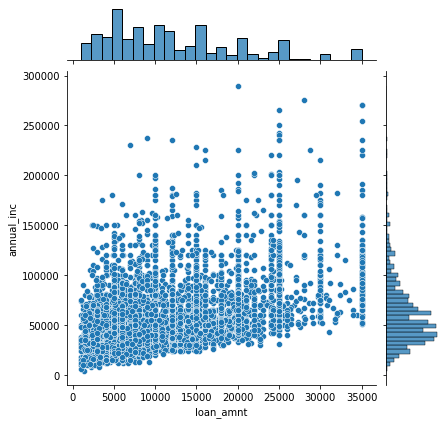

In [100]:
sb.jointplot(y = 'annual_inc',x=  'loan_amnt', data = final_loan[final_loan.annual_inc<300000][final_loan.loan_status=='Charged Off'])


### There are people with income lower than 50000 taking loans of 25000 or higher would be risky loans.

## Attribute loan_amount and grade

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

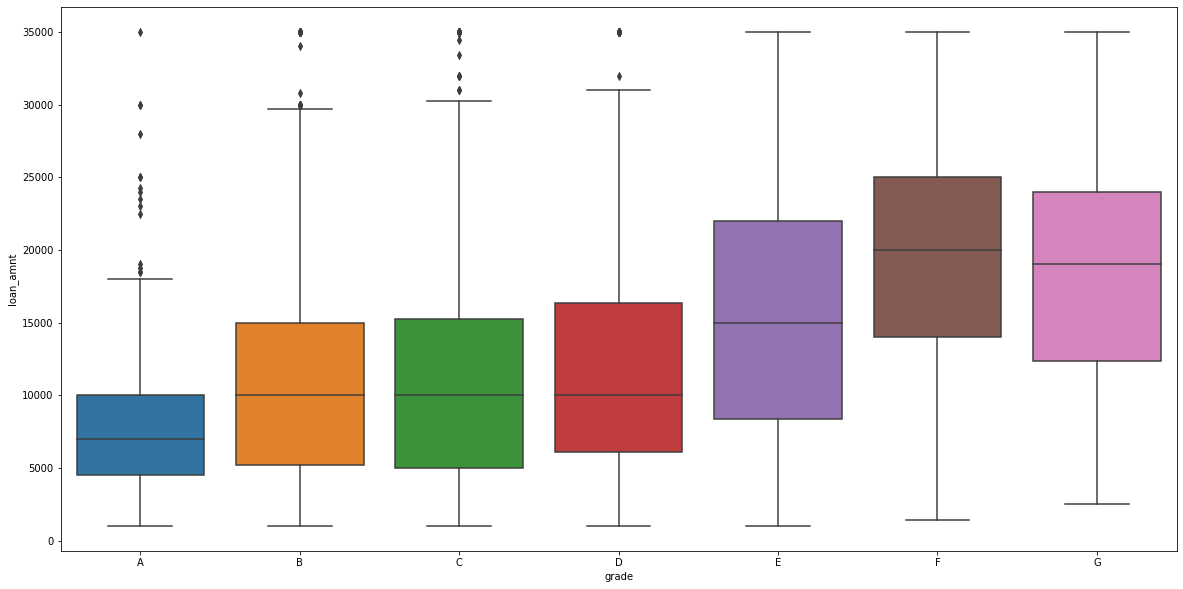

In [101]:
plt.figure(figsize=(20,10))
sb.boxplot(x = 'grade', y ='loan_amnt',data = charged_off_loans,order = sorted(list(set(charged_off_loans.grade.sort_values()))))

### Attribute loan_amount, grade and interest rate

<AxesSubplot:xlabel='int_rate_bins', ylabel='loan_amnt'>

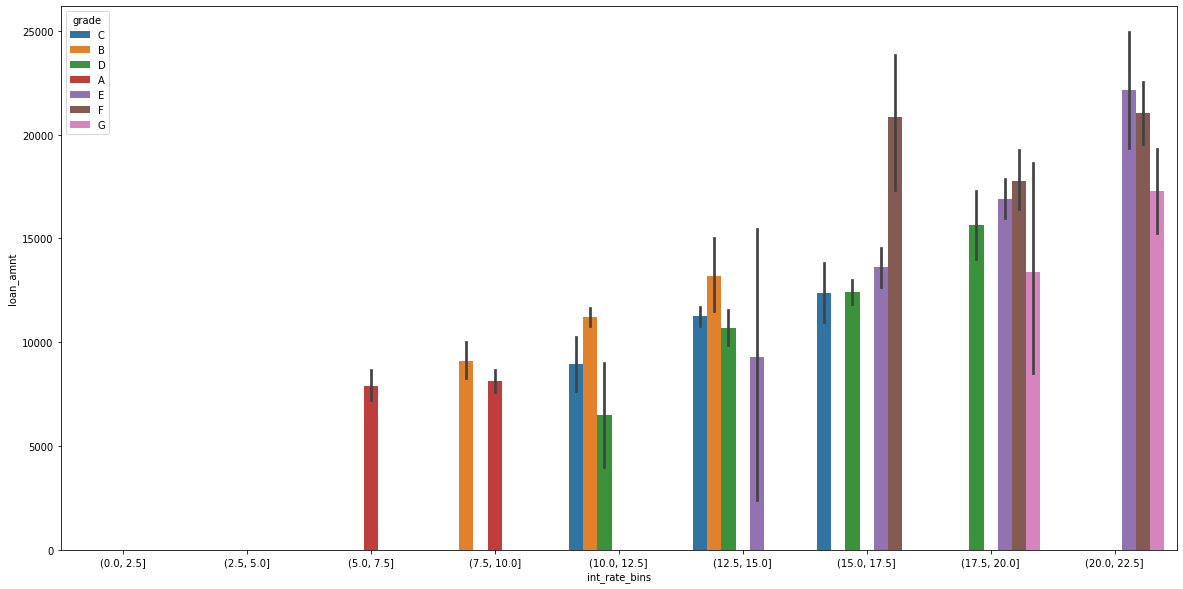

In [102]:
plt.figure(figsize=(20,10))
sb.barplot(x='int_rate_bins', y='loan_amnt', hue="grade",data=final_loan[final_loan.loan_status=='Charged Off'], estimator=np.mean)

### Analysis 
- Loan amount keeps increasing with decling grade resulting in higher rate of default due to higher interest rate 
- Therefore lower grade suggest higher loan amount and high risk which results in loan default

## Attribute loan_amount and term


<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

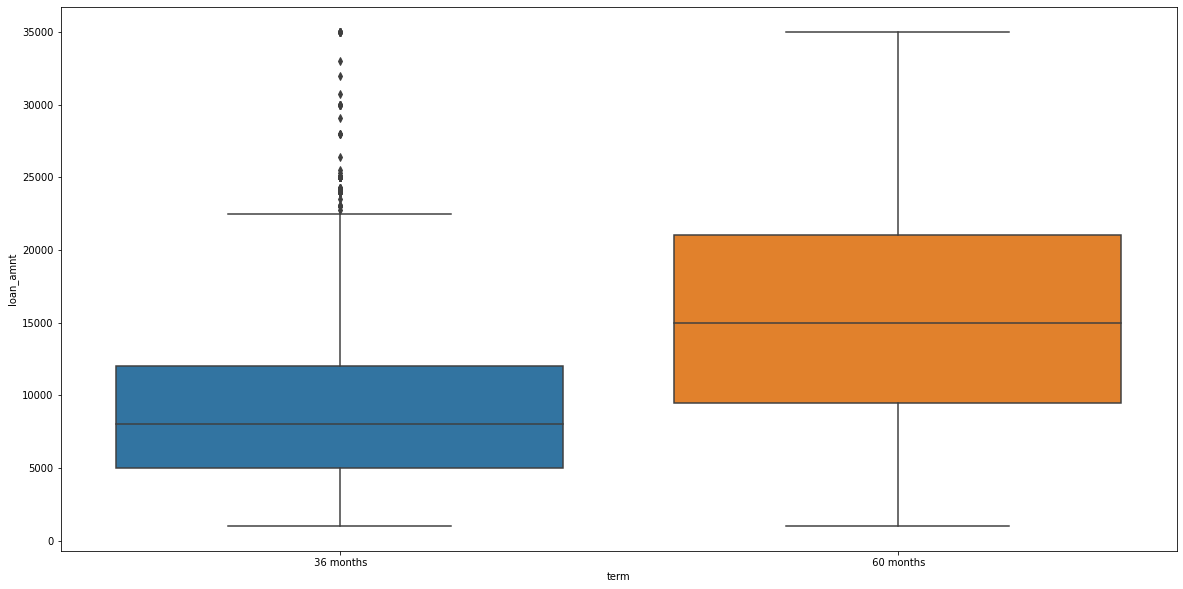

In [103]:
plt.figure(figsize=(20,10))
sb.boxplot(x = 'term', y ='loan_amnt',data = charged_off_loans,order=charged_off_loans.term.value_counts().sort_values(ascending=False).index)

### Attribute loan_amount, term and interest rate

<AxesSubplot:xlabel='int_rate_bins', ylabel='loan_amnt'>

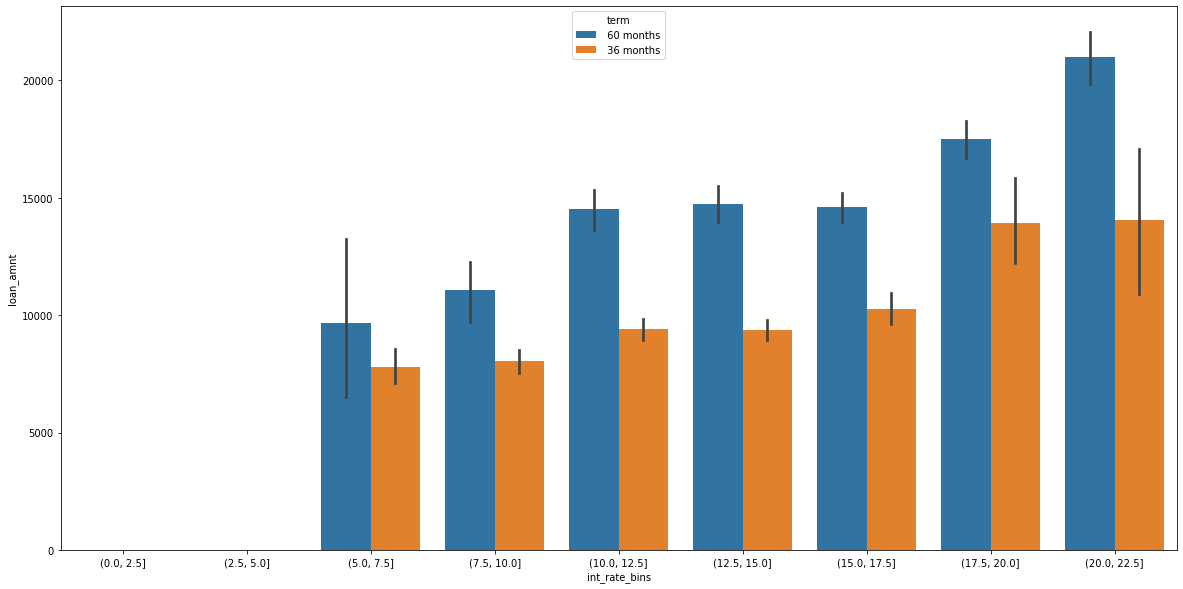

In [104]:
plt.figure(figsize=(20,10))
sb.barplot(x='int_rate_bins', y='loan_amnt', hue="term", data=final_loan[final_loan.loan_status=='Charged Off'], estimator=np.mean)

### Analysis
1. It is evident that 60 months term with larger loan amount are associated with higher interest rate which increases the rate of default 
3. Rate of default is higher when the term is 60 months due to higher loan amount which indicates risk associated with it

## Attribute loan_amount and verfication status


<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

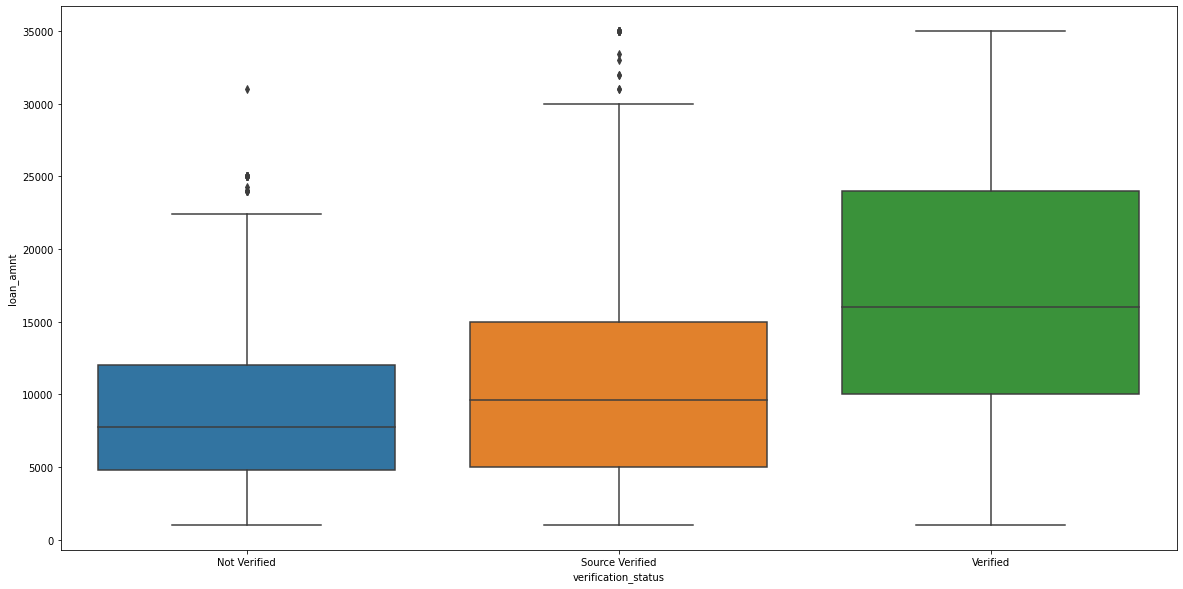

In [105]:
plt.figure(figsize=(20,10))
sb.boxplot(x = 'verification_status', y ='loan_amnt',data = charged_off_loans,order = ['Not Verified','Source Verified','Verified'])

### Attribute loan_amount, term and verification_status

<AxesSubplot:xlabel='int_rate_bins', ylabel='loan_amnt'>

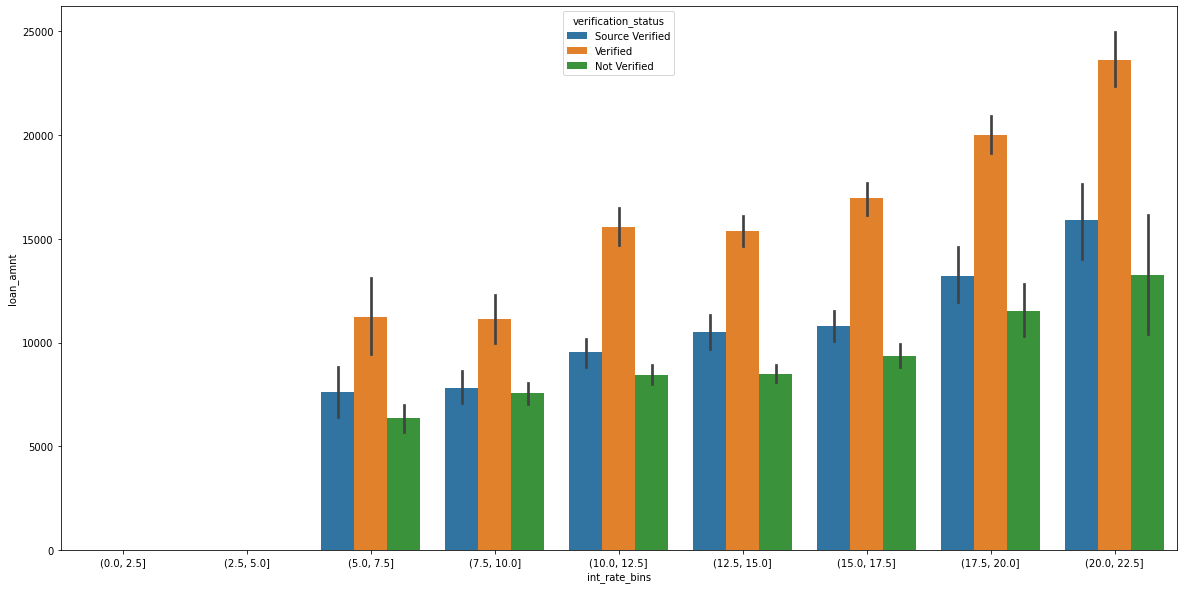

In [106]:
plt.figure(figsize=(20,10))
sb.barplot(x='int_rate_bins', y='loan_amnt', hue="verification_status", data=final_loan[final_loan.loan_status=='Charged Off'], estimator=np.mean)

### Analysis
- There is higher default rate for verfied higher amount loans
- Higher loan amounts are riskier and are also verified more often by Lending Club.
- As the risk associated is high for higher loan amounts and therfore there is need to verify the income source, combined with higher interest rate associated to this results in high rate of default

## Attribute loan_amount and loan_status

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

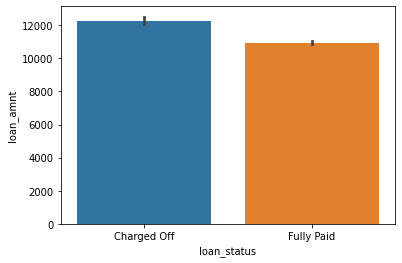

In [107]:
sb.barplot(x = 'loan_status', y = 'loan_amnt',data = final_loan)

## Attribute loan_amount and dti

<AxesSubplot:xlabel='dti_bucket', ylabel='loan_amnt'>

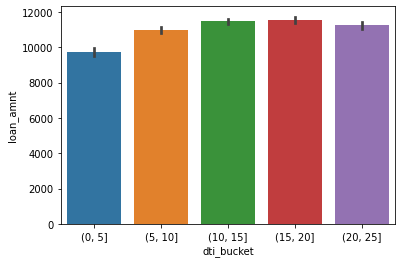

In [108]:
sb.barplot(x = 'dti_bucket', y = 'loan_amnt',data = final_loan)

### Analysis
- dti keeps increasing for higher loan amounts as the debt increase for higher loan amounts

## Attribute loan_amount and purpose

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

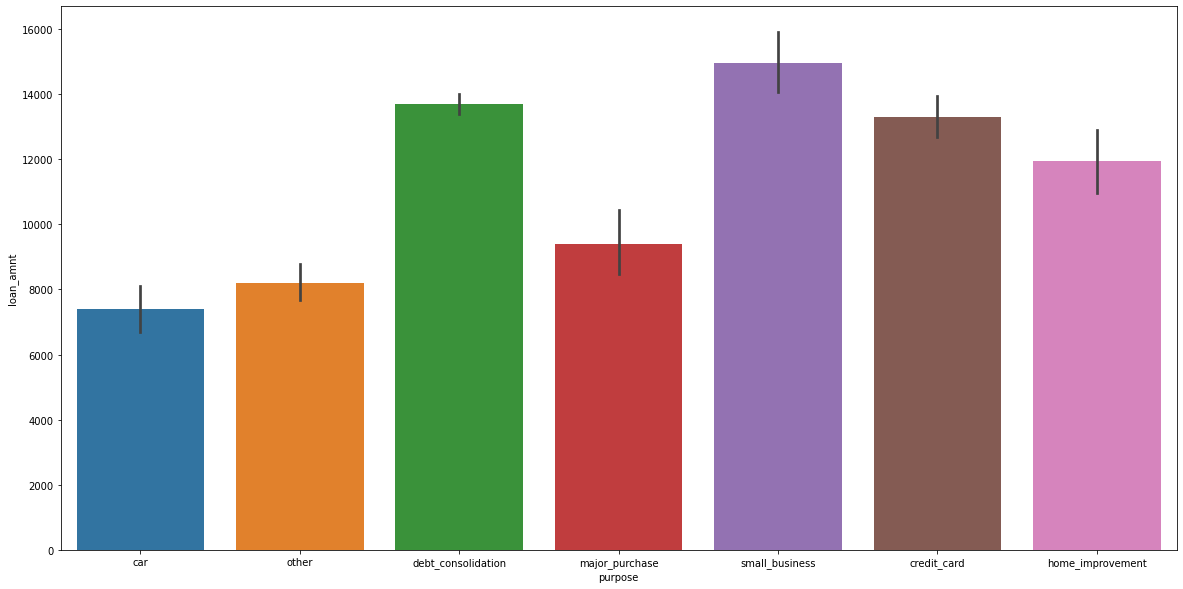

In [109]:
plt.figure(figsize=(20,10))

sb.barplot(x = 'purpose', y = 'loan_amnt',data = final_loan[final_loan.purpose.isin(top7_purpose.index)][final_loan.loan_status=='Charged Off'])


c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='int_rate_bins', ylabel='loan_amnt'>

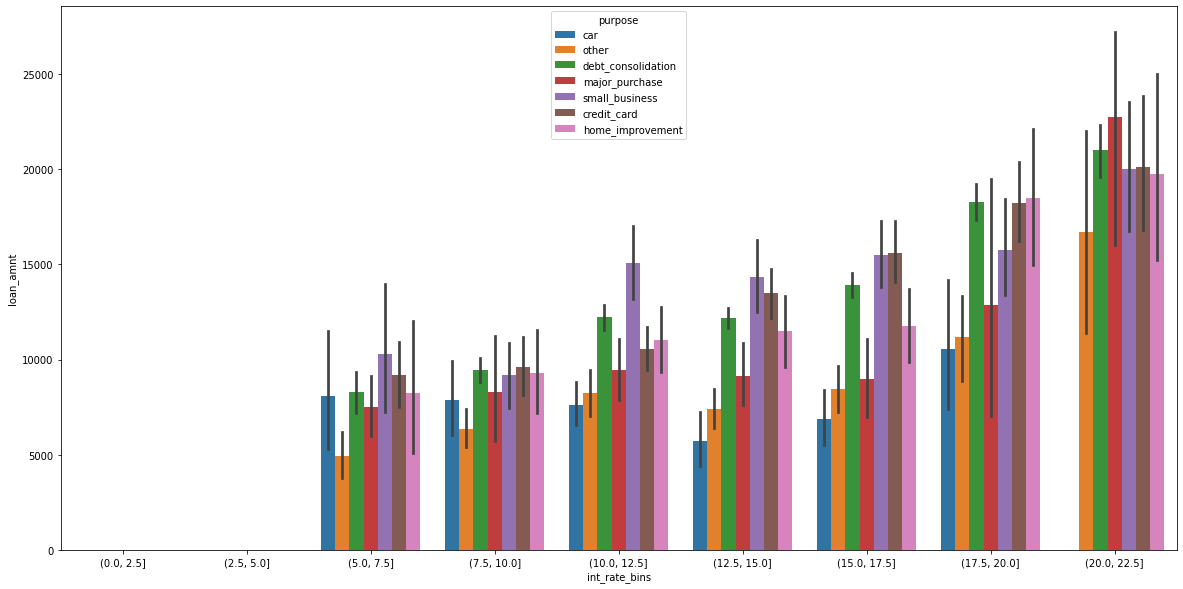

In [110]:
plt.figure(figsize=(20,10))
sb.barplot(x='int_rate_bins', y='loan_amnt', hue="purpose", data=final_loan[final_loan.purpose.isin(top7_purpose.index)][final_loan.loan_status=='Charged Off'], estimator=np.mean)

### Analysis
- Rate of default is higher for small_business, debt_consolidation and credit
- __debt_consolidation__ : 
    - New loans taken to pay off other liabilities and consumer debts, don't erase the original debt but transfer a consumer's loans to a different lender or type of loan
    - Therefore these type of loans are still in risk of default as the consumer is not able to pay off the loan from prior lender
- __small_business__ :
    - small businesses acquiring higher amounts of loans, result in default as the risk increases
- Rate of default  for differernt purposes seems to rise for higher loans amounts with increasing interest rates

## Attribute dti and purpose

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


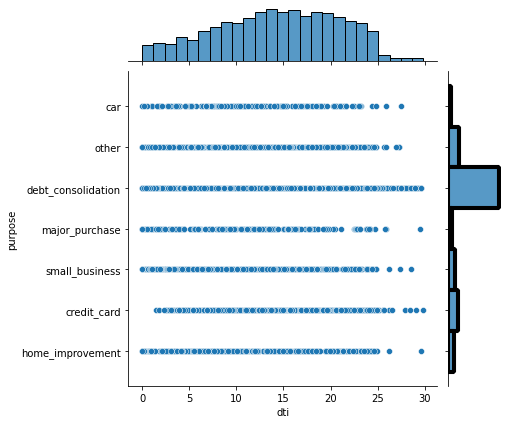

In [111]:
g = final_loan[final_loan.purpose.isin(top7_purpose.index)][final_loan.loan_status=='Charged Off']
f = sb.jointplot(x = 'dti', y = 'purpose',data = g)


c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='purpose', ylabel='dti'>

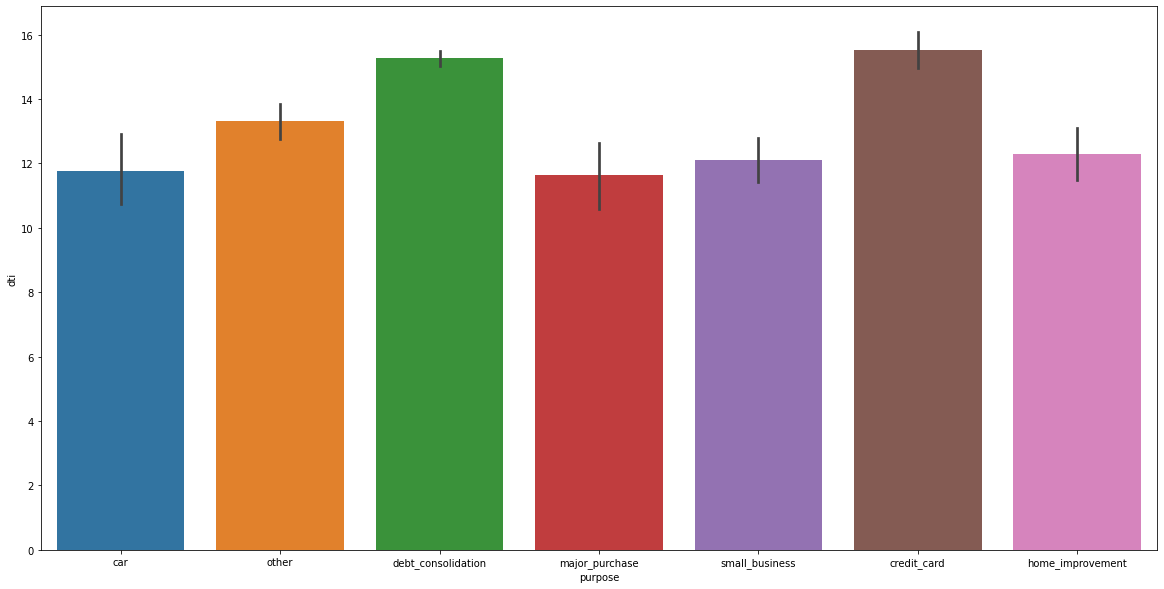

In [112]:
plt.figure(figsize=(20,10))

sb.barplot(y = 'dti', x = 'purpose',data = final_loan[final_loan.purpose.isin(top7_purpose.index)][final_loan.loan_status=='Charged Off'])

### Analysis
- High DTI ratio can signal that an individual has too much debt for the amount of income earned each month which explain the reason for to default
    - debt conslidation suggests the consumer was not able to repay the loan to the previous lender therefore taking a new loan from a different vendor to pay it.
    - dti for purposes debt_consolidation and credit_card is high as their debt to income ratio is higher therefore increasing the chance of default

### Attribute dti and term

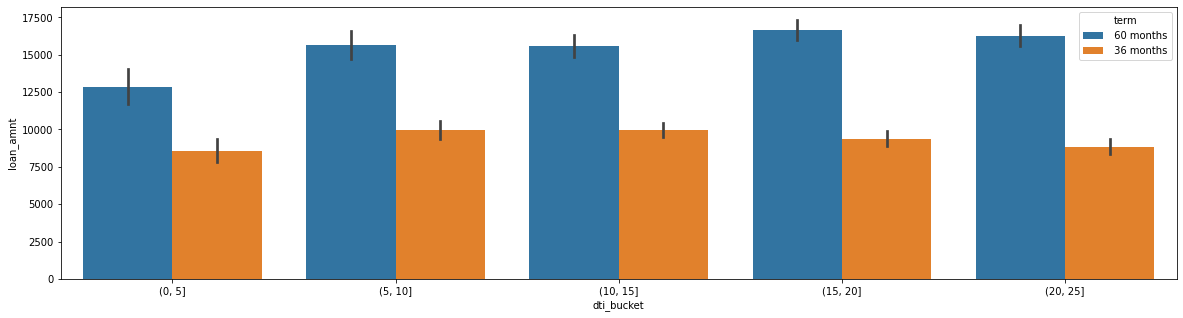

In [113]:
plt.figure(figsize=(20,5))
sb.barplot(x='dti_bucket', y='loan_amnt',hue='term',data=final_loan[final_loan.loan_status=='Charged Off'])
plt.show()

### Attribute dti and open_acc

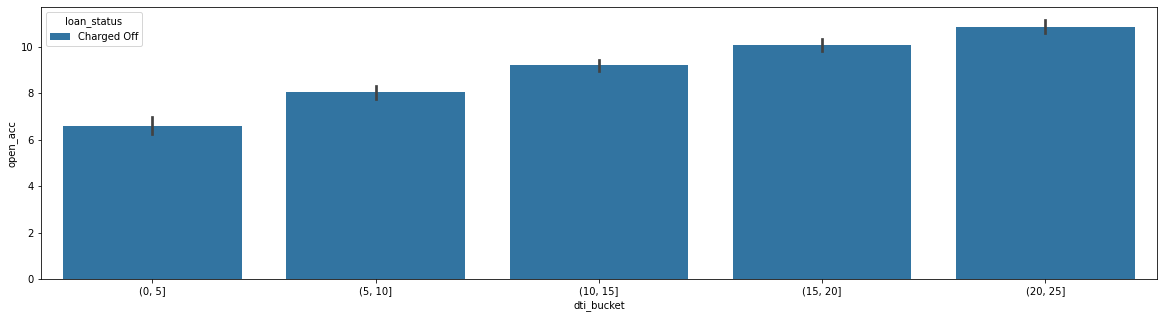

In [114]:
plt.figure(figsize=(20,5))
sb.barplot(x='dti_bucket', y='open_acc', hue='loan_status',data=final_loan[final_loan.loan_status=='Charged Off'], estimator=np.mean)
plt.show()

### Analysis 
- The dti increses with the number of open credit line in borrowers credit file.

## Attribute dti, grade

<AxesSubplot:xlabel='grade', ylabel='dti'>

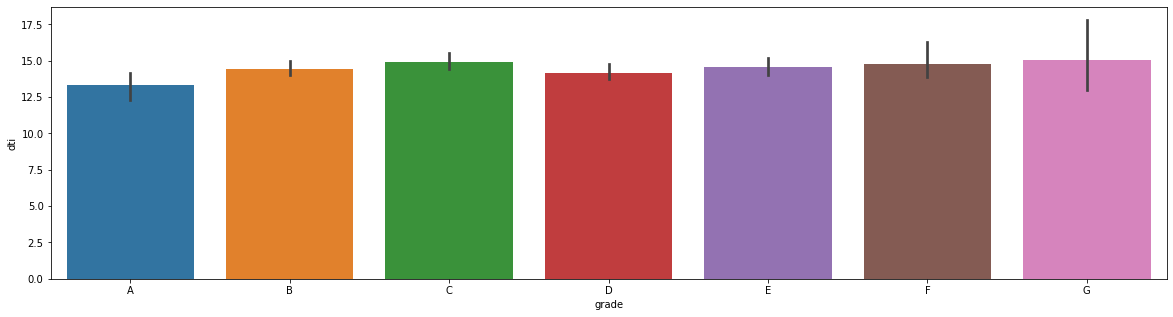

In [115]:
plt.figure(figsize=(20,5))
sb.barplot(y='dti', x='grade',data=final_loan[final_loan.loan_status=='Charged Off'],estimator = np.median,order =  sorted(list(set(charged_off_loans.grade.sort_values()))))

## Attribute dti, annual_inc

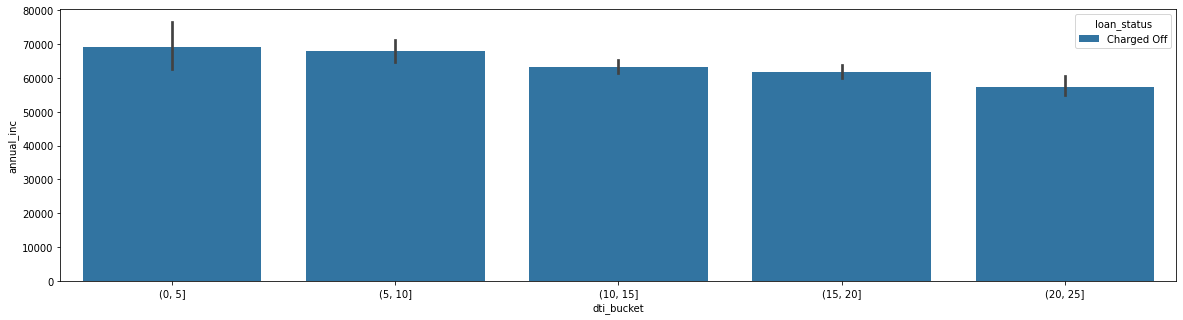

In [116]:
plt.figure(figsize=(20,5))
sb.barplot(x='dti_bucket', y='annual_inc', hue='loan_status',data=final_loan[final_loan.loan_status=='Charged Off'])
plt.show()

### Analysis 
- Consumers with higher dti ratio and lesser income tend to default more than consumers with lower dti ratio and higher income
- Which suggests the debt ratio is greater than gross income earned

## Attribute dti, revol_util

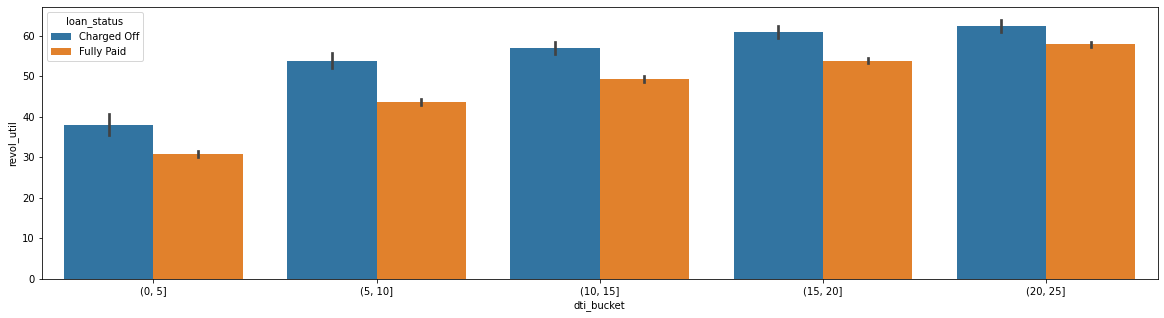

In [117]:
plt.figure(figsize=(20,5))
sb.barplot(x='dti_bucket', y='revol_util', hue='loan_status',data=final_loan)
plt.show()

### Analysis 
- Rate of default increase with increase in the amount of credit the borrower is using which is also relative to dti

## Attribute grade and int_rate

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

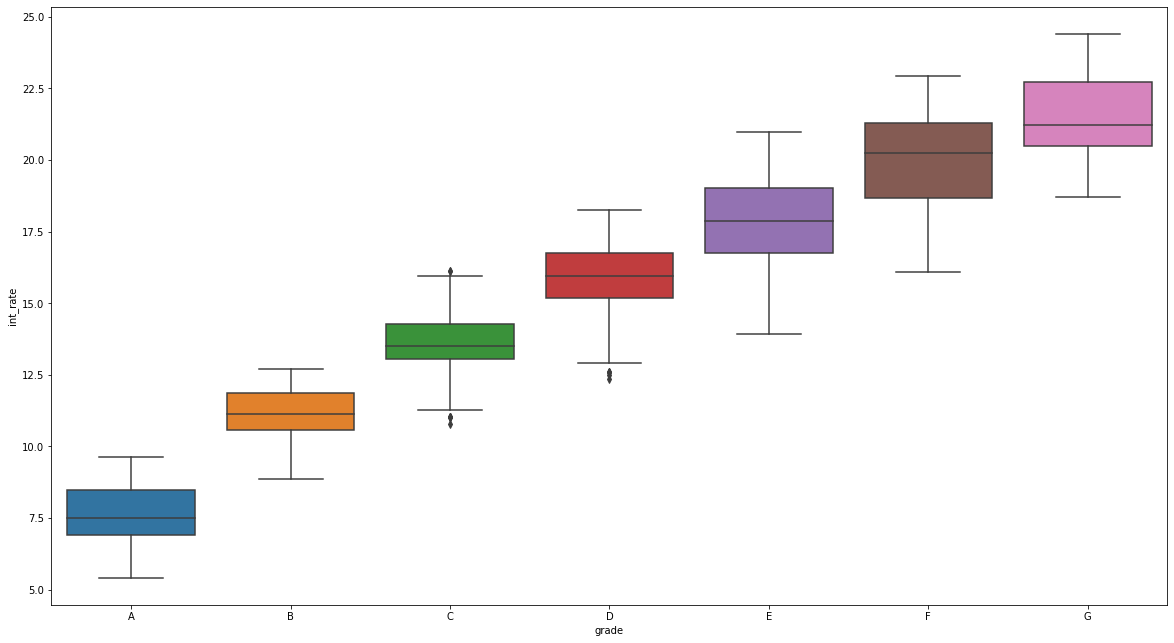

In [118]:
plt.figure(figsize=(20,11))

sb.boxplot(x = 'grade' , y = 'int_rate',data = charged_off_loans,order = sorted(list(set(charged_off_loans.grade.sort_values()))))

### Analysis 
- With decling grades and increasing interest rates indicate rise in rate default

## Attribute annual_inc and grade

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

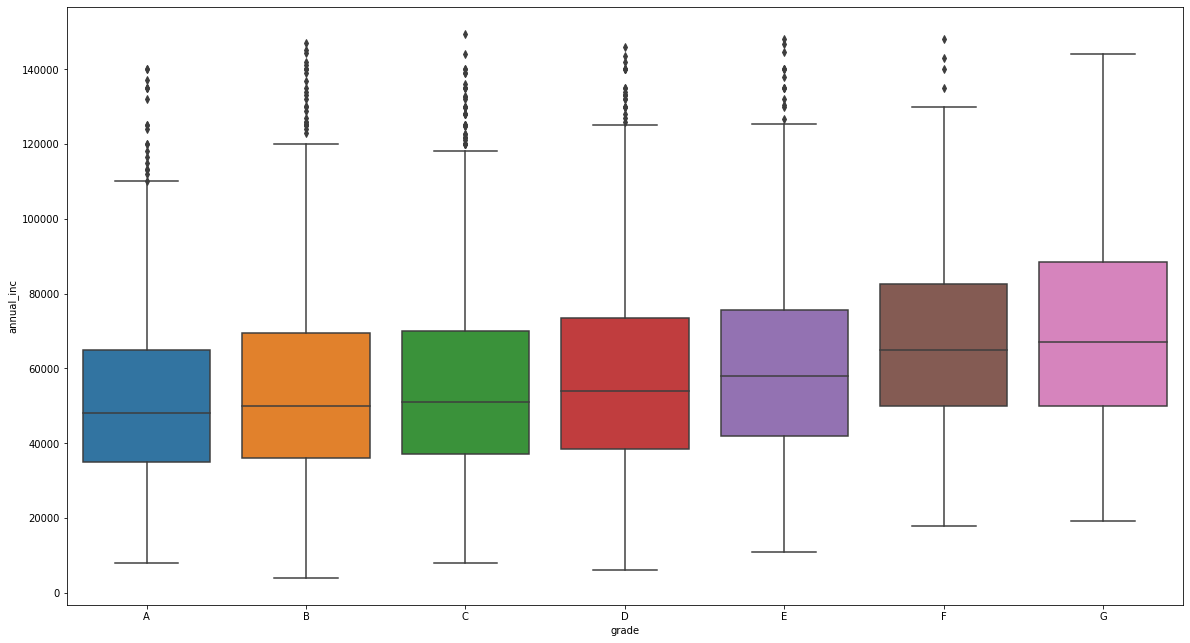

In [119]:
plt.figure(figsize=(20,11))

sb.boxplot(x = 'grade' , y = 'annual_inc',data = charged_off_loans[charged_off_loans.annual_inc<150000],order = sorted(list(set(charged_off_loans.grade.sort_values()))))

### Analysis
- Median annual income rises with declining grades
- declining grades indicate larger loans due the risk
- Inference can be drawn that with increasing annual income, consumer tend to take larger loans which is the reason they tend towards decling grades

## Attribute term and grade

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


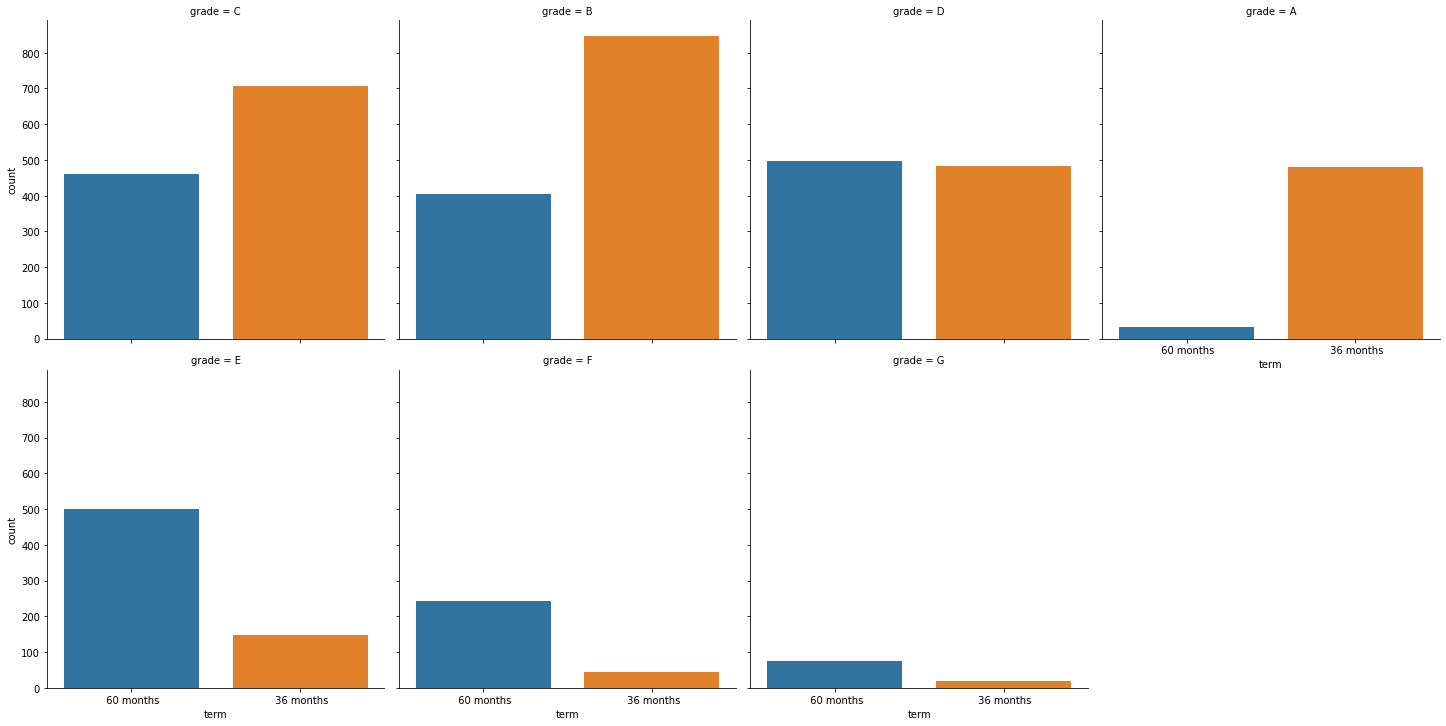

In [120]:
sb.factorplot("term", col = "grade", col_wrap = 4,data = charged_off_loans,kind = "count")
plt.show()

### Analysis
- Higher grade loans are mostly for 36 months
- Lower grade loans are for 60 months which result in charge off

c:\anaconda\envs\upgrad_base\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


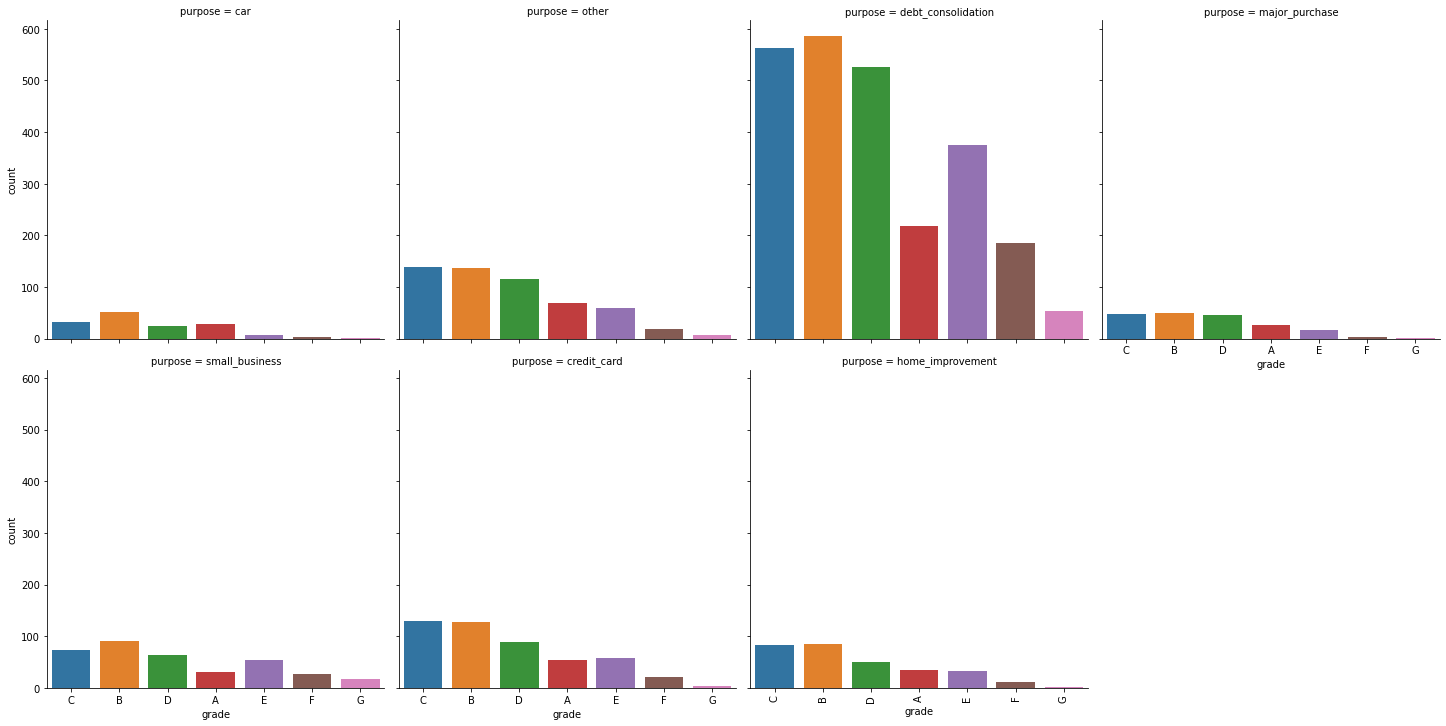

In [121]:
g= sb.factorplot("grade", col = "purpose", col_wrap = 4,data = final_loan[final_loan.purpose.isin(top7_purpose.index)][final_loan.loan_status=='Charged Off'],kind = "count")
plt.xticks(rotation = 90)
plt.show()

### Analysis
- loans taken for debt consilidation have high rate of default

## Attribute employee length , grade

<AxesSubplot:xlabel='grade', ylabel='emp_length'>

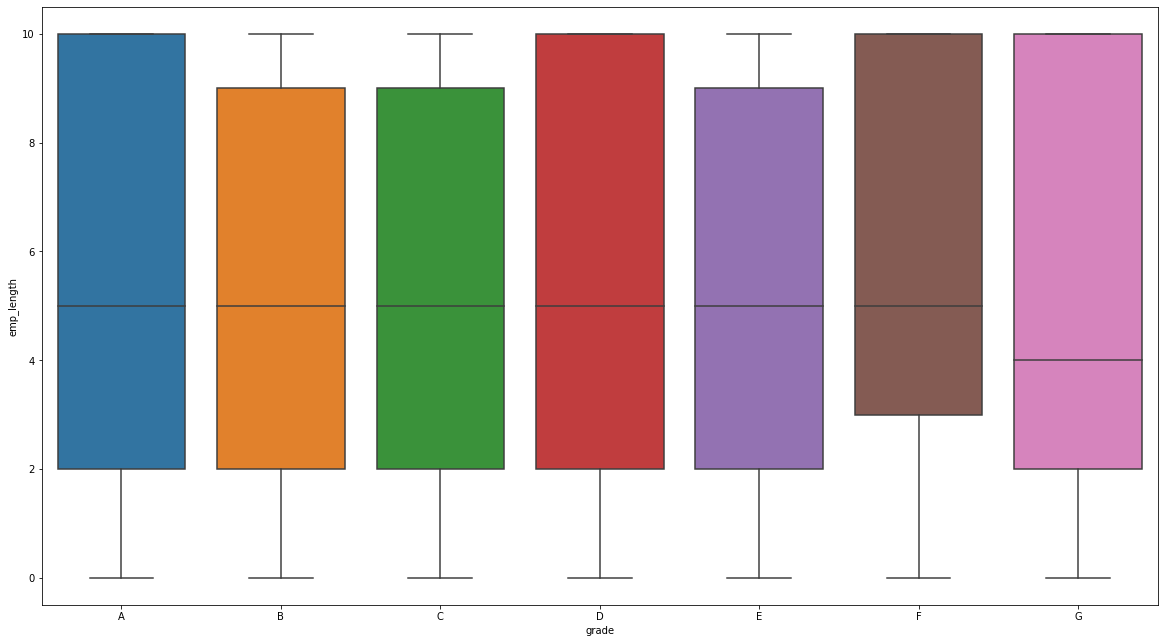

In [122]:
plt.figure(figsize=(20,11))

sb.boxplot(x = 'grade' , y = 'emp_length',data = charged_off_loans,order = sorted(list(set(charged_off_loans.grade.sort_values()))))

## Attribute grade, revol_util and loan_status

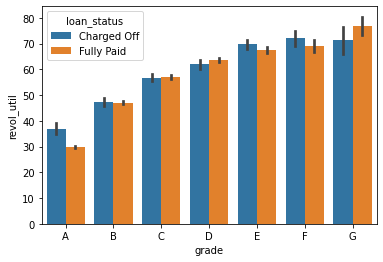

In [123]:
sb.barplot(x='grade', y='revol_util', hue="loan_status", data=final_loan, estimator=np.mean,order = sorted(list(set(charged_off_loans.grade.sort_values()))))
plt.show()

### Analysis 
- revol_util and grade(and therefore int_rate) are correlated in some way.
- The revol_util is positively correlated to the grade.
- As the grade goes from A to E the revol_util also increases.
- This may be because higher loan amounts are associated with higher grades.

## Attribute revol_util and int_rate

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


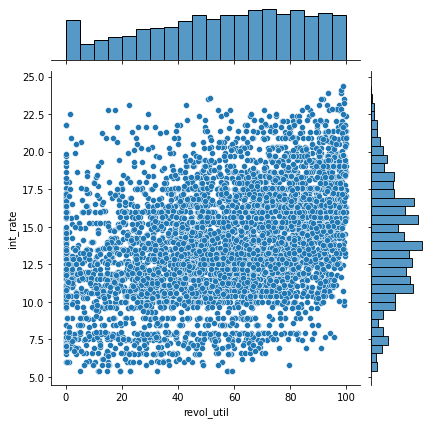

In [124]:
sb.jointplot('revol_util', 'int_rate', charged_off_loans)

## Attribute revol_util and grade

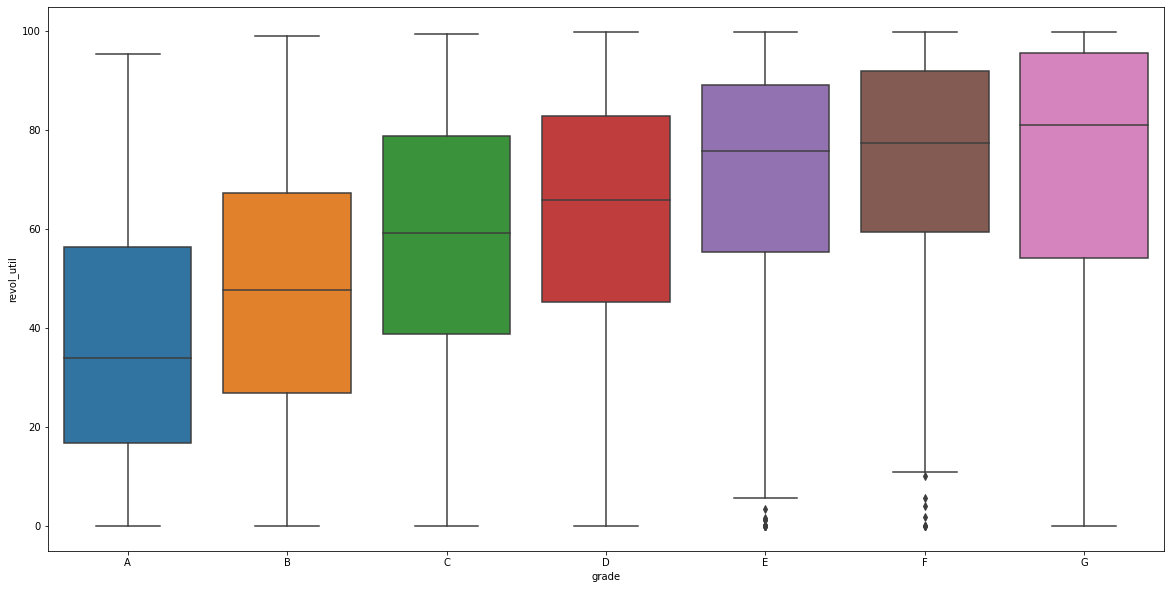

In [125]:
plt.figure(figsize=(20,10))
sb.boxplot(x = 'grade',y='revol_util',data = charged_off_loans,order = sorted(list(set(charged_off_loans.grade.sort_values()))))
plt.show()

### Analysis 
- revol_util increase from higher to lower grades therefore also increase rate of default

## Attribute purpose and employement length

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'renewable_energy'),
  Text(1, 0, 'vacation'),
  Text(2, 0, 'car'),
  Text(3, 0, 'moving'),
  Text(4, 0, 'educational'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'wedding'),
  Text(8, 0, 'credit_card'),
  Text(9, 0, 'medical'),
  Text(10, 0, 'other'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'debt_consolidation'),
  Text(13, 0, 'house')])

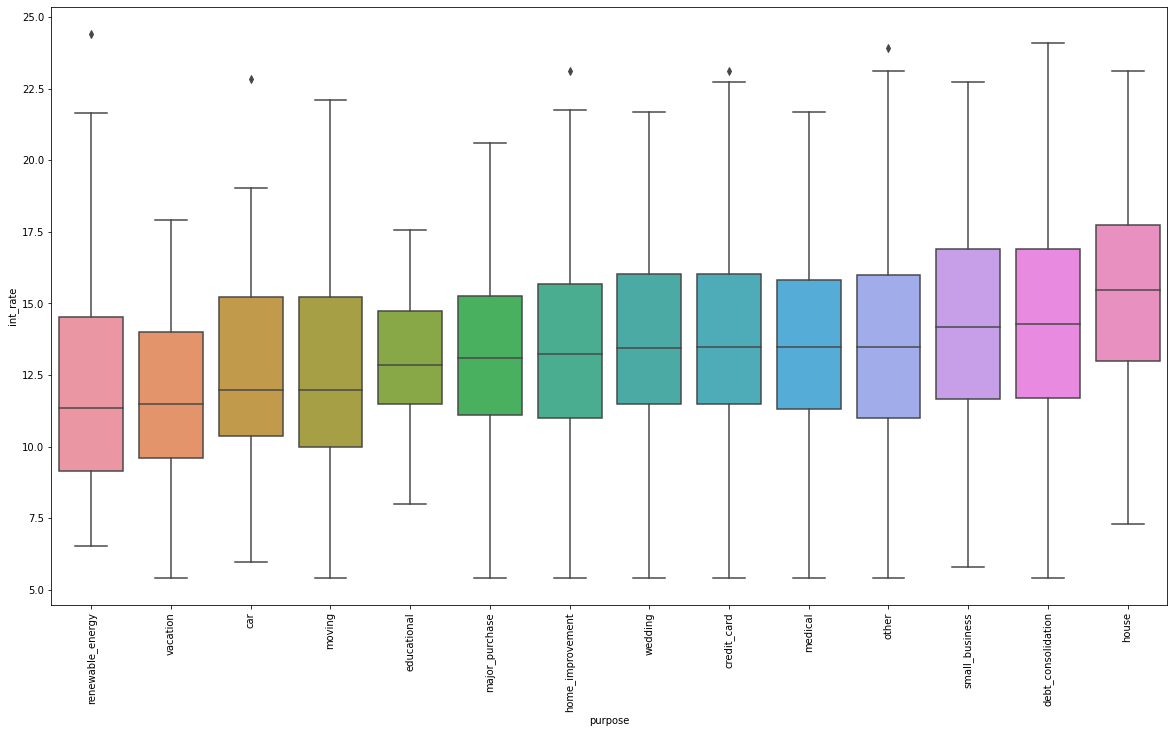

In [126]:
plt.figure(figsize=(20,11))

sb.boxplot(x = 'purpose' , y = 'int_rate',data = charged_off_loans,order = charged_off_loans.groupby(['purpose']).int_rate.median().sort_values().index)
plt.xticks(rotation=90)

## Attribute int_rate and term

<AxesSubplot:xlabel='term', ylabel='int_rate'>

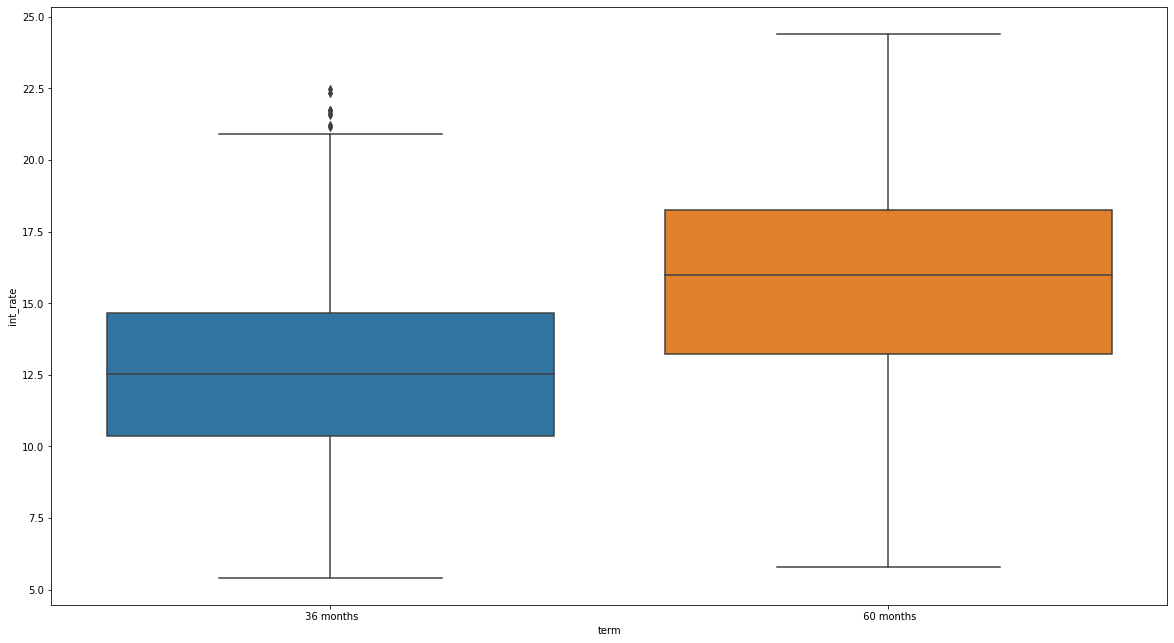

In [127]:
plt.figure(figsize=(20,11))

sb.boxplot(x = 'term' , y = 'int_rate',data = charged_off_loans,order = charged_off_loans.groupby(['term']).int_rate.median().sort_values().index)

### Analysis
- Charged off loans with term 60 months have higher interest rate 
- There of risk of default is also high

<AxesSubplot:>

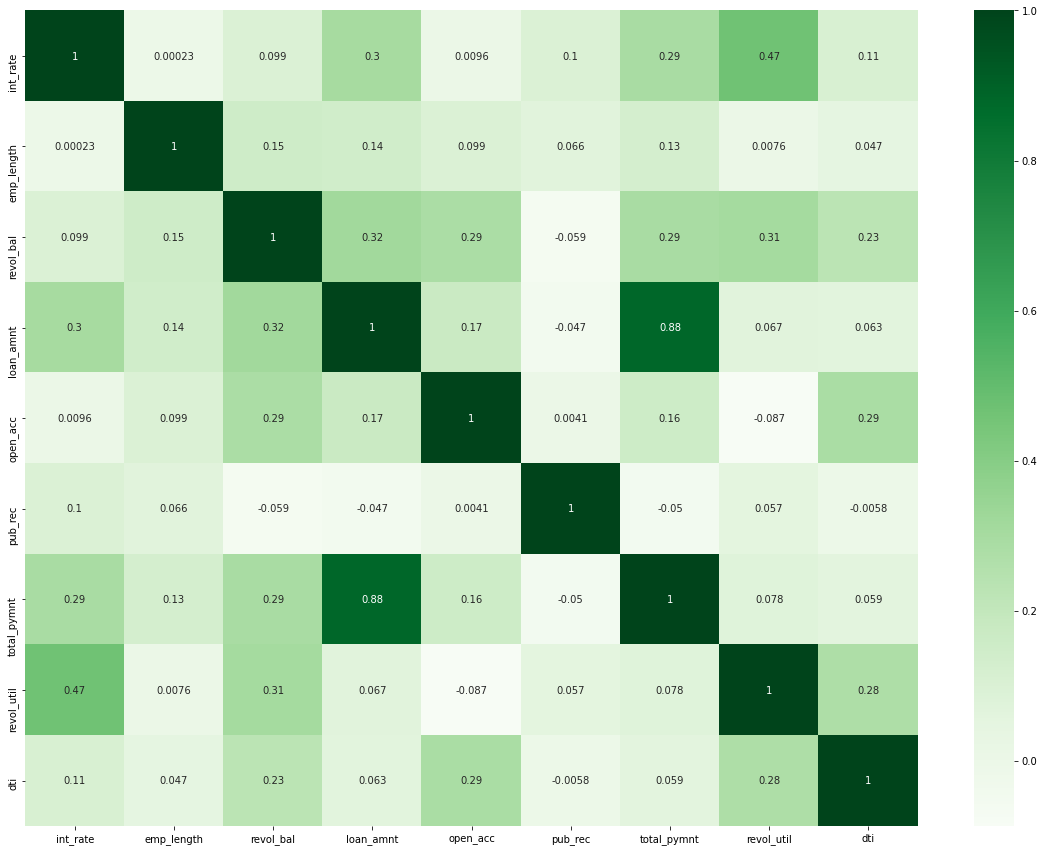

In [128]:
plt.figure(figsize=(20,15))

corr_list = ['int_rate','emp_length','loan_status','revol_bal','grade','home_ownership','loan_amnt','last_pymnt_d','last_credit_pull_d','open_acc','term','pub_rec','total_pymnt','revol_util','purpose','verification_status','dti']

sb.heatmap(final_loan[corr_list].corr(),annot=True,cmap="Greens")

### Analysis
- int_rate and revol_util have correlation of `0.47` - As interest rate increases with risk
- total payment and loan amount are highly correlated `0.88` as it suggests if the loan is fully paid or defaulted

## Attribute pub_rec and loan_status

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

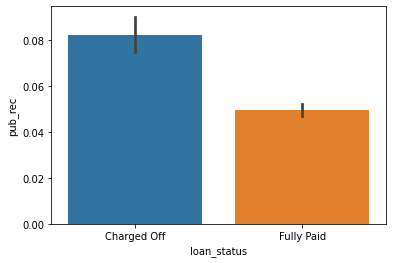

In [129]:
sb.barplot(x = 'loan_status', y = 'pub_rec',data = final_loan)

### Analysis 
- Mean of pub_rec for charged off loans is greater than fully paid loans which suggests rate of default increase when derogatory records increases

## Attribute delinq_2yrs and loan_status

<AxesSubplot:xlabel='loan_status', ylabel='delinq_2yrs'>

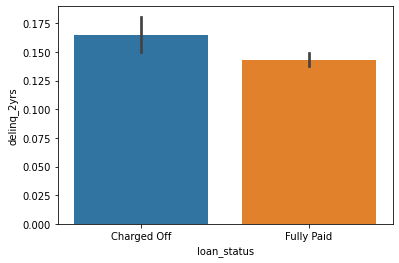

In [130]:
sb.barplot(x = 'loan_status', y = 'delinq_2yrs',data = final_loan)

<AxesSubplot:xlabel='grade', ylabel='delinq_2yrs'>

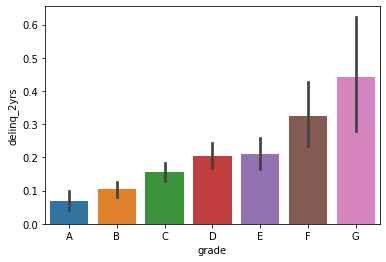

In [131]:
sb.barplot(x = 'grade', y = 'delinq_2yrs',data = charged_off_loans,order = sorted(list(set(charged_off_loans.grade.sort_values()))))

## Attribute loan amount, grade and delinq_2yrs

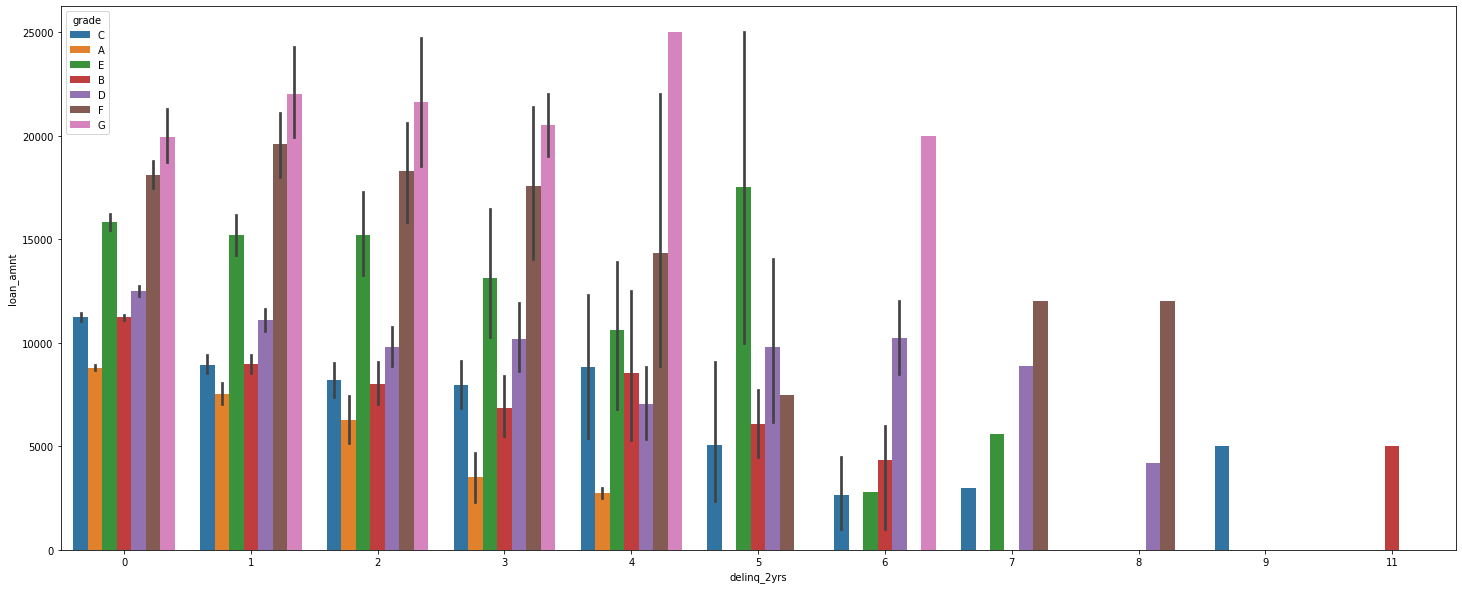

In [132]:
plt.figure(figsize=(25,10))
sb.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=final_loan, estimator=np.mean)
plt.show()

### Analysis
- Not many loans receive invstment with higher number of delinquencies(>3). 
- Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.

## Attribute open_acc and dti

c:\anaconda\envs\upgrad_base\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


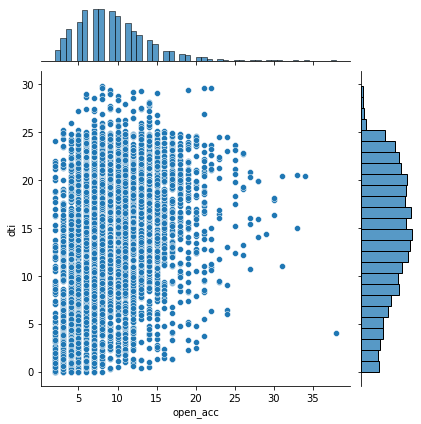

In [133]:
sb.jointplot('open_acc', 'dti', charged_off_loans)